<a href="https://colab.research.google.com/github/chandrakar-shubham/Bike-Sharing-Demand-Prediction--ML-regression-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Data Dictionary

**df** = It is dataframe which created from database "SeoulBikeData.csv"

**dict_rename_col** = It is a dictionary contains name of feature as key and corresponding replacement name as value.

**all_features** = It is name of all features in the database

**numerical_features** = It is a list that contains name of all numerical features in the database

**categorical_features** = It is a list that contains name of all categorical features of database

**calculate_iqr** = It is function to calculate uppper limit and lower limit of IQR(Inter quartile range)

**df['day']** = It is a series that contains day number extracted from date feature from df 

**df['month']** = It is a series that contains month number extracted from date feature from df 

**df['week_day']** = It is a series that contains week day number extracted from date feature from df

**convert_hour** = It is a function to convert hour of the day into four time slot

**remove_features** = It contains name of features to be removed from df

**add_cat_features** = It contains name of categorical features to be added to list of categorical_features

**df2** = It is a dataframe which is copy of df

**df2['time_slot']** = It is a series that contains name of time_slot converted to hours 

**season_demand** = It is a dataframe which contains name of season and total demand of rental bikes in that season.

**weekday_demand** = It is a dataframe which contains name of day of the week and total demand of rental bikes in that week day.

**month_demand** = It is a dataframe which contains name of number of the month and total demand of rental bikes in that month.

**hour_demand** = It is a dataframe which contains name of number of the hour and total demand of rental bikes in that hour.

**calc_vif** = It is a function to calculate VIF

**df1** = It is a dataframe which is copy of dataframe df

**dependent_var** : It is a list which  contains name of dependent feature

**independent_var** : It is a list which  contains name of independent feature

**X** = It is a dataframe which consist all values of features in list of  independent variable

**y** = It is a dataframe which consist all values of features in list of dependent variable










# Intution

**ML Lifecycle**

1. Defining problem statement
|
2. Data Wrangling
|
3. Feature Engineering
|
4. EDA
|
Repeat Step 3
|
6. Correlation Analyis
|
Repeat Step 3
|
7. VIF analysis
|
Repeat Step 3
|
Final features for model
|
8. Data Preprocessing : Categorical Encoding
|
9. Target variable Treatment
|
10. Train test split| Normalisation of data
|
11. Model Buiding
  1. Est. Baseline model
  2. Experimentation with various models
  3. Hyperparameter tuning
  4. Evaluation of models using evaluation metrices
  5. Repeat 11.1 to 11.4 if result is not optimum Repeat Step 3 to Step 11
|
12. Establish best performing model with some degree of explaianbiilty
|
13. Model deployement: Git, VScode, Flask, RestAPI, Python , Virtual Env
  1. Create new Git Repo
  2. Use template to create DIR structure
  3. Create Virtual Env
  3. Create train.py, model.py 
  4. Pickle model file and version it
  5. Create flask app.py
    1. Use HTTP request GET to create Homepage
    2. Use POST request to take input of data in form of JSON and output the prediction
  6. Deploy model by creating VM in AWS or Dockerize and add it in VM on AWS

First Iteration Waterfall model ML Lifecycle

Next Iteration versioned model using Git Version Control


# Importing libraries

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing essential libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Data

In [ ]:
#importing data into dataframe
file_path ='/content/drive/MyDrive/Capstone projects/Bike Sharing Demand Prediction/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv'
df = pd.read_csv(file_path,encoding = "ISO-8859-1")

# Helper functions

In [ ]:
def convert_hour(input_hour):

  '''convert hour of the day into four time slot''' 


  if 5 <= input_hour <12:
    return 'morning'
  elif 12<= input_hour < 17:
    return 'afternoon'
  elif 17 <= input_hour < 22:
    return 'evening'
  else:
    return 'night'

In [ ]:
def calculate_iqr(col):
  
  '''to calculate up_limit and lower limit of IQR'''
  
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  up_limit = 1.5 * iqr + q3
  low_limit = q1 - 1.5 * iqr

  return up_limit,low_limit,q1,q3

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Data Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# checking top 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# checking last 5 rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


#Checking for duplicated row

No duplicated rows found

In [ ]:
# checking for duplicated rows
len(df[df.duplicated()])

0

#Checking for null/NaN/Missing values

No null/nan/missing values found

In [ ]:
#cheking for null values in every column

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#Generating descriptive statistics

df.describe([0.75,0.90,0.95,0.99])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
90%,1671.100000,21.000000,28.000000,86.000000,3.200000,2000.000000,21.000000,2.051000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
99%,2526.230000,23.000000,35.100000,97.000000,4.700000,2000.000000,24.700000,3.170000,4.000000,2.500000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Renaming column name to simply process during analysis and model building

In [ ]:
#rename columns

dict_rename_col = {'Temperature(°C)':'temp',
                   'Humidity(%)':'humidity',
                   'Wind speed (m/s)':'wind_speed',
                   'Visibility (10m)':'visibility',
                   'Dew point temperature(°C)':'dew_point_temperature',
                   'Solar Radiation (MJ/m2)':'solar_radiation',
                   'Rainfall(mm)':'rainfall',
                   'Snowfall (cm)':'snowfall',
                   'Rented Bike Count':'rented_bike_count',
                   'Hour':'hour',
                   'Seasons':'seasons',
                   'Holiday':'holiday',
                   'Functioning Day':'functioning_day',
                   'Date':'date'
                   }

df = df.rename(columns = dict_rename_col)

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Various features in the list

In [ ]:
#all features
all_features = list(df.columns)



#numerical features

numerical_features = list(df.describe().columns)
 
numerical_features.remove("hour")
#categorical features

categorical_features = [col for col in all_features if col not in numerical_features]


print(f'Name of all features are as follows : {all_features}') 
print(f'Total features : {len(all_features)}')
print(f'Name of numerical features are as follows : {numerical_features}')
print(f'Total numerical features : {len(numerical_features)}') 
print(f'Name of categorical features are as follows : {categorical_features}')
print(f'Total categorical features: {len(categorical_features)}')





Name of all features are as follows : ['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day']
Total features : 14
Name of numerical features are as follows : ['rented_bike_count', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
Total numerical features : 9
Name of categorical features are as follows : ['date', 'hour', 'seasons', 'holiday', 'functioning_day']
Total categorical features: 5


#Checking distribution of dependent feature

           We can observe that data is postively skewed it will need some treatment such as
           - Log transformation
           - Box-Cox transformation
           - Yeo-Johnson power transformation

In [ ]:
round(df['rented_bike_count'].skew(),2)

1.15

Degree of skewness for dependent variable is = 1.15




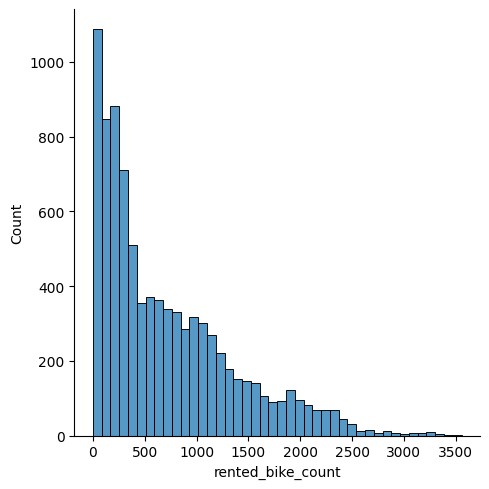

In [ ]:
#distrution of dependent variable

sns.displot(df['rented_bike_count'])
skewness_dvar = round(df['rented_bike_count'].skew(),2)
print(f'Degree of skewness for dependent variable is = {skewness_dvar}')
print('\n')

After giving log transformation,it can be seen that it is now treated

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


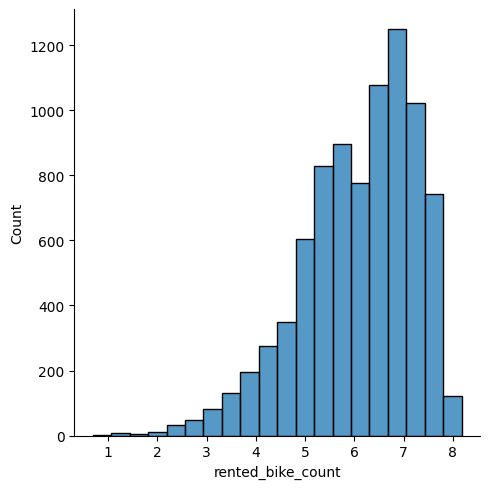

In [ ]:
sns.displot(np.log(df['rented_bike_count']),bins = 20)

#Outlier Removal

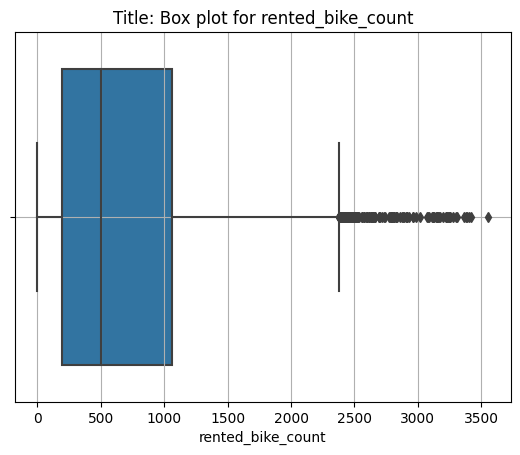

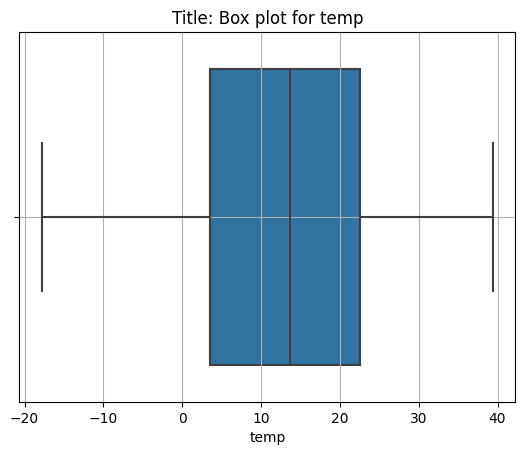

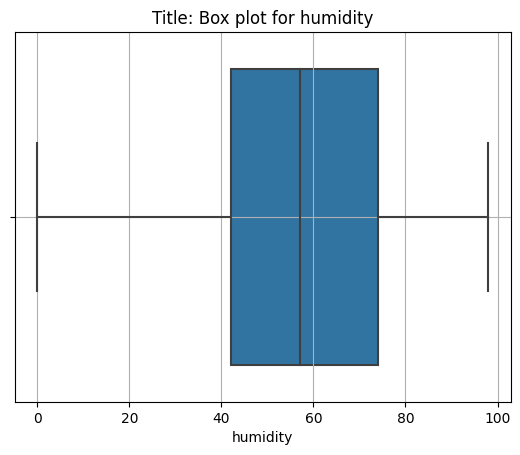

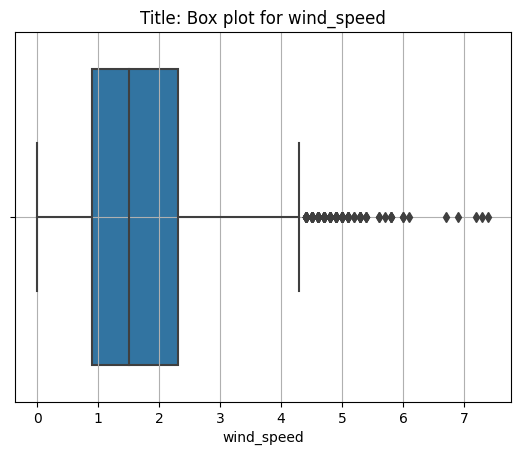

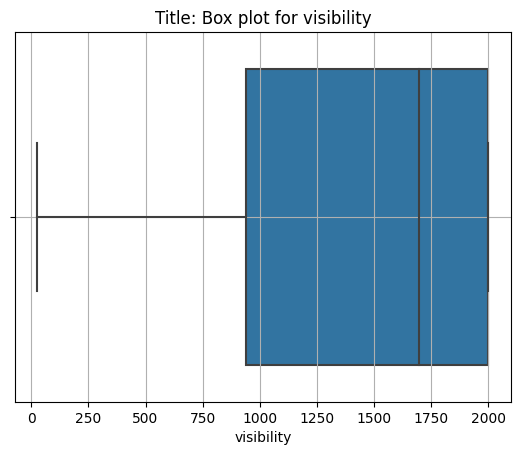

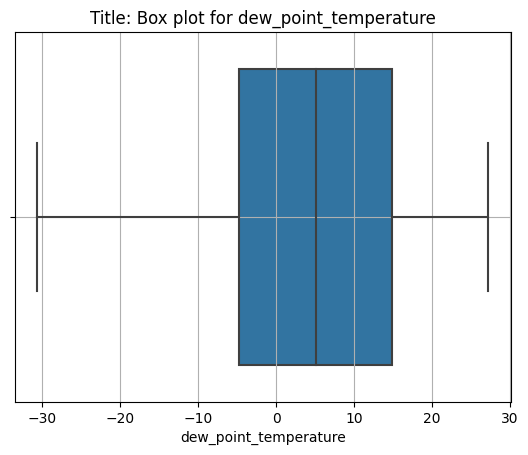

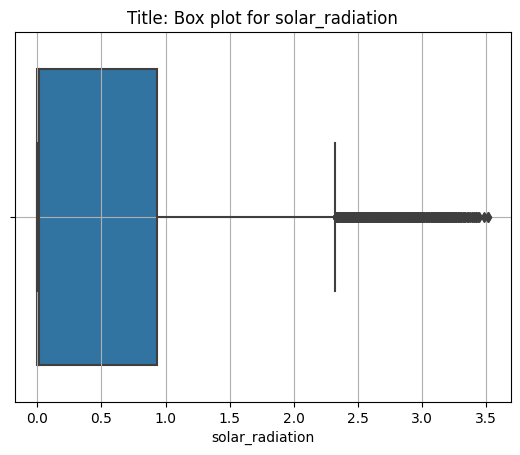

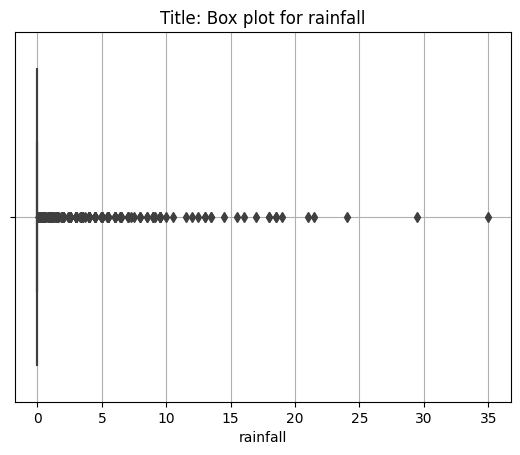

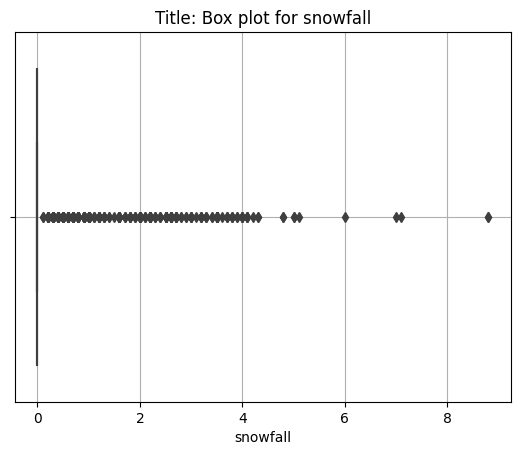

In [ ]:
# plotting box plot to check outliers

for col in numerical_features:
  sns.boxplot(x=df[col])
  plt.title(f"Title: Box plot for {col}")
  plt.grid()
  plt.show()
  print('\n')

It can be seen that there are outliers present in the following columns:
- rented bike count
- windspeed
- solar radiation
- rainfall
- snowfall

Removing outlier from rented_bike_count feature

In [ ]:
up_limit_rbc,low_limit_rbc,q1,q3 = calculate_iqr('rented_bike_count')

up_limit_rbc,low_limit_rbc,q1,q3

(2376.625, -1120.375, 191.0, 1065.25)

In [ ]:
df['rented_bike_count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented_bike_count, dtype: float64

In [ ]:
# no. of outliers in rented bike count feature

len(df[df['rented_bike_count'] > up_limit_rbc])

158

In [ ]:
# removing outliers from rented_bike_count

df = df[df['rented_bike_count'] < up_limit_rbc]

Removing outlier from wind_speed column

In [ ]:
up_limit_ws,low_limit_ws,q1,q3 = calculate_iqr('wind_speed')

up_limit_ws,low_limit_ws,q1,q3

(4.3999999999999995, -1.1999999999999997, 0.9, 2.3)

In [ ]:
# no of outliers in wind_speed feature

len(df[df['wind_speed']>up_limit_ws])

161

In [ ]:
df = df[df['wind_speed']<up_limit_ws]

Removing outliers from solar radiation

In [ ]:
up_limit_sr,low_limit_sr,q1,q3 = calculate_iqr('solar_radiation')

up_limit_sr,low_limit_sr,q1,q3

(2.25, -1.35, 0.0, 0.9)

In [ ]:
# no of outliers in solar_radiation feature

len(df[df['solar_radiation']>up_limit_sr])

681

In [ ]:
df['solar_radiation'].describe([0.025,0.75,0.90,0.95,0.975,0.99])

count    8441.000000
mean        0.556472
std         0.866590
min         0.000000
2.5%        0.000000
50%         0.000000
75%         0.900000
90%         2.050000
95%         2.550000
97.5%       2.890000
99%         3.170000
max         3.520000
Name: solar_radiation, dtype: float64

In [ ]:
# trimming of data

df = df[df['solar_radiation']<up_limit_sr]

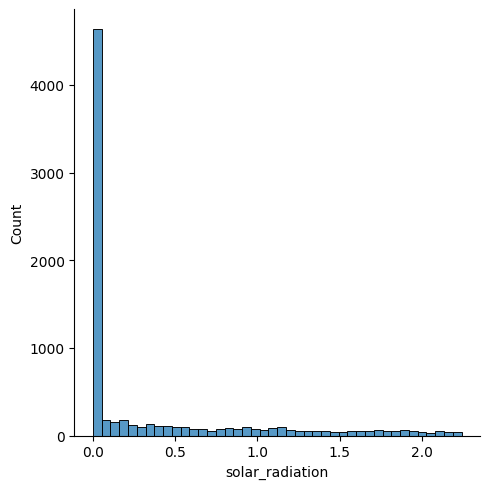

In [ ]:
#distribution of solar_radiation feature
sns.displot(df['solar_radiation'])
plt.show()

Outliers not removed because most of the value of solar radiation is 0. So it does not make sense to keep this column.

Action : This column will be dropped, so not removing outliers

Removing outliers from rainfall column

In [ ]:
df['rainfall'].describe()

count    7751.000000
mean        0.164830
std         1.188578
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: rainfall, dtype: float64

In [ ]:
up_limit_rainfall,low_limit_rainfall,q1,q3 = calculate_iqr('rainfall')

up_limit_rainfall,low_limit_rainfall,q1,q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
# no of outliers in rainfall feature

len(df[df['rainfall']>up_limit_rainfall])

512

In [ ]:
df = df[df['rainfall']==up_limit_rainfall]

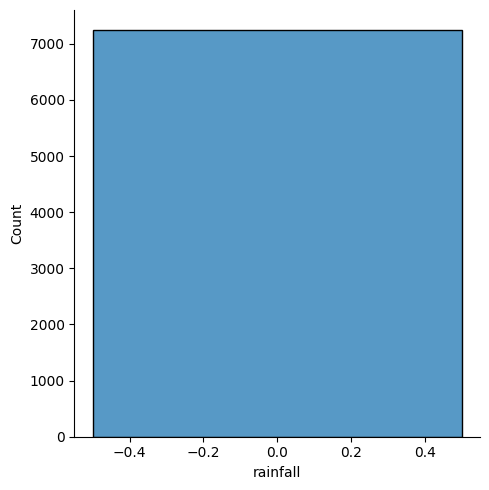

In [ ]:
sns.displot(df['rainfall'])
plt.show()

It can be seen that distribution of rainfall is uniform so, it will not make any sense to keep this column so this column will be removed.

Action : Column will be dropped

Removing outliers snowfall

In [ ]:
up_limit_snowfall,low_limit_snowfall,q1,q3 = calculate_iqr('snowfall')

up_limit_snowfall,low_limit_snowfall,q1,q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df['snowfall'].describe()

count    7239.000000
mean        0.081669
std         0.446468
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: snowfall, dtype: float64

In [ ]:
# trimming snowfall feature
df=df[df['snowfall']==up_limit_snowfall]

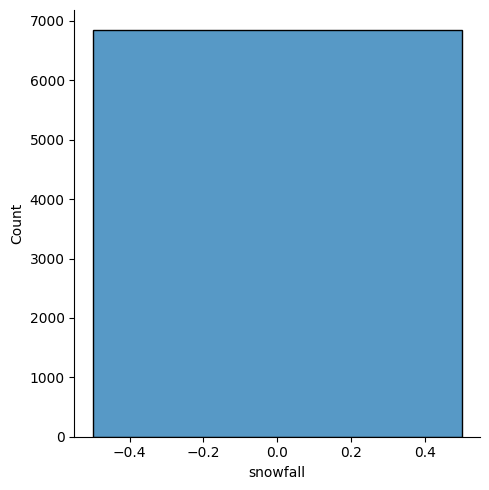

In [ ]:
#checking distribution of snowfall
sns.displot(df['snowfall'])

Again this distribution is highly skewed and most of the values are near to 0. So this feature is not usefull for making ML model so this feature will be dropped.

Note: Drop the columns

#Feature engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   6841 non-null   object 
 1   rented_bike_count      6841 non-null   int64  
 2   hour                   6841 non-null   int64  
 3   temp                   6841 non-null   float64
 4   humidity               6841 non-null   int64  
 5   wind_speed             6841 non-null   float64
 6   visibility             6841 non-null   int64  
 7   dew_point_temperature  6841 non-null   float64
 8   solar_radiation        6841 non-null   float64
 9   rainfall               6841 non-null   float64
 10  snowfall               6841 non-null   float64
 11  seasons                6841 non-null   object 
 12  holiday                6841 non-null   object 
 13  functioning_day        6841 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 801.7+ 

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# convert the 'Date' column to datetime format
df['date']= pd.to_datetime(df['date'],format="%d/%m/%Y")

In [ ]:
#extracting day,month,week day and month and creating new column respectively

df['day'] = df['date'].dt.day
df['month'] =df['date'].dt.month
df['week_day'] = df['date'].dt.weekday



In [ ]:
#dropping date column
dft = df.copy()
df.drop(columns='date',inplace=True)

In [ ]:
df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day,month,week_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,4


Dropping unwanted columns from dataframe df

In [ ]:
#checking solar_radiation feature

df.solar_radiation.value_counts()

df.drop(columns='solar_radiation',inplace=True)

In [ ]:
#checking rainfall feature

df.rainfall.value_counts()

#all values are 0, there it will be better to drop this column
df.drop(columns='rainfall',inplace=True)

In [ ]:
#checking snowfall feature

df.snowfall.value_counts()

#all values are 0, there it will be better to drop this column
df.drop(columns='snowfall',inplace=True)

In [ ]:
#checking seasons feature

df.seasons.value_counts()

Autumn    1861
Winter    1682
Spring    1674
Summer    1624
Name: seasons, dtype: int64

In [ ]:
#checking holiday feature

df.holiday.value_counts()

No Holiday    6499
Holiday        342
Name: holiday, dtype: int64

In [ ]:
#checking functioning_day feature
df.functioning_day.value_counts()


Yes    6583
No      258
Name: functioning_day, dtype: int64

Basic feature engineering is done rest required will be done after EDA, Correlation analysis 

#Univarite analyisis

In [ ]:
#removing removed features from the its respective list 

remove_features = ['snowfall','rainfall','solar_radiation']

numerical_features = [col for col in numerical_features if col not in remove_features]

In [ ]:
numerical_features

['rented_bike_count',
 'temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temperature']

In [ ]:
# add new features to its respective list

add_cat_features = ['day','month','week_day']
categorical_features.extend(add_cat_features)

In [ ]:
categorical_features

['date',
 'hour',
 'seasons',
 'holiday',
 'functioning_day',
 'day',
 'month',
 'week_day']

In [ ]:
# removing date from this list

categorical_features

categorical_features.remove('date')

print(categorical_features)

['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'week_day']


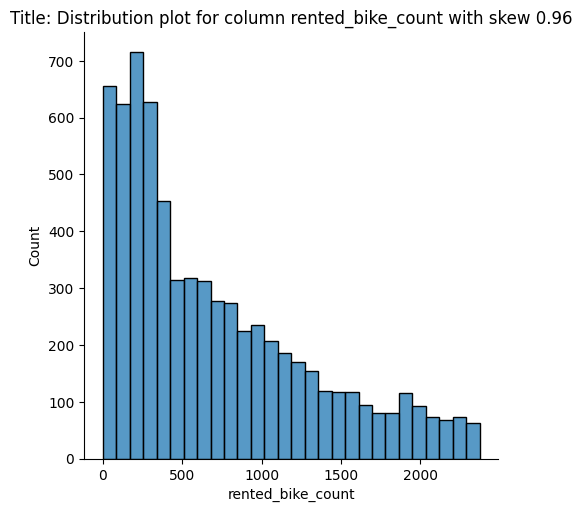

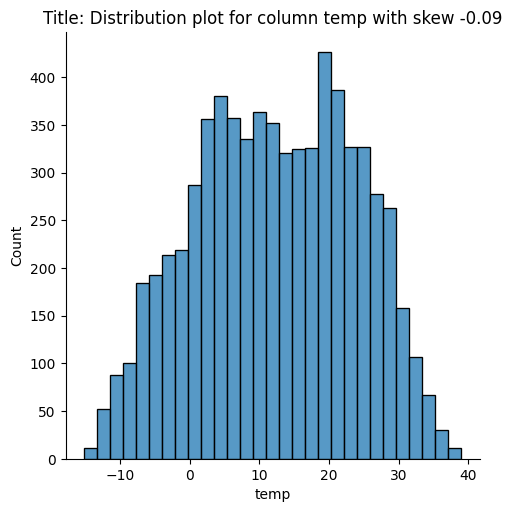

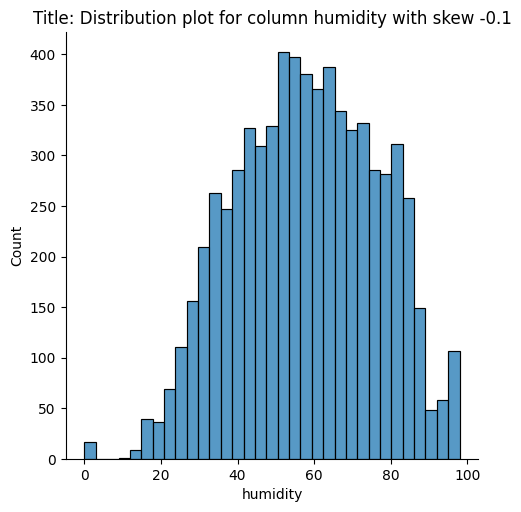

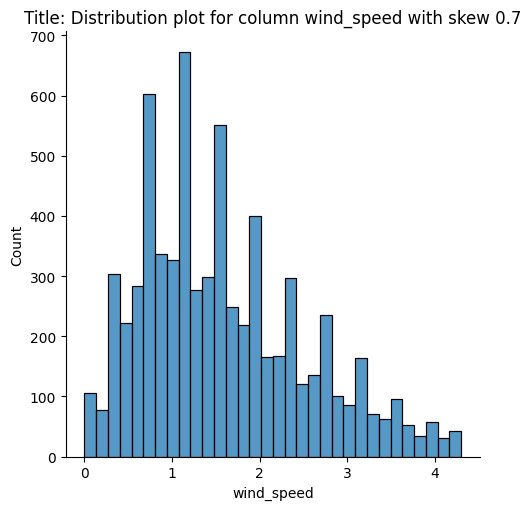

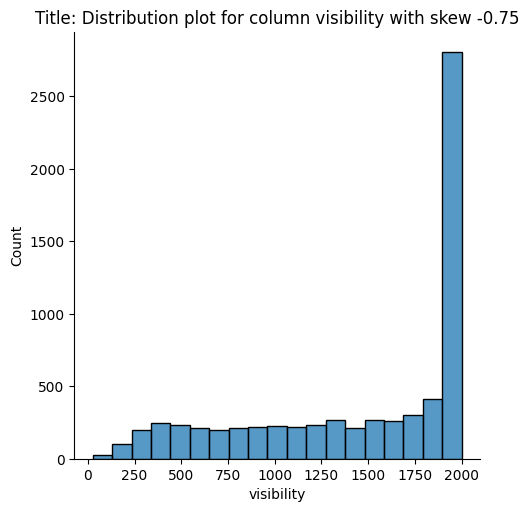

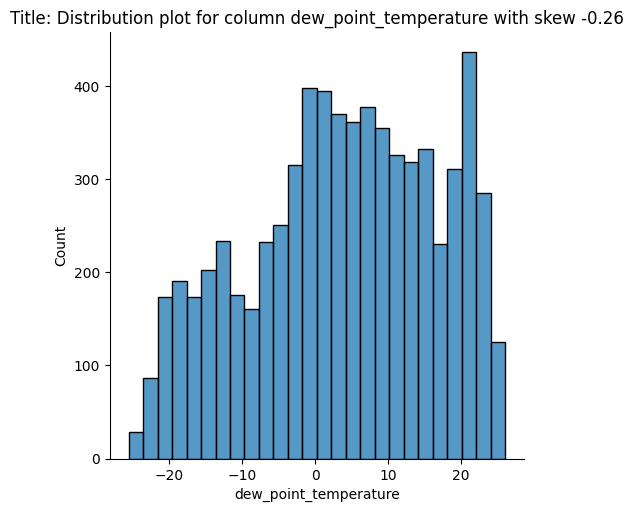

In [ ]:
#checking distribution of all numerical features

for col in numerical_features:
  sns.displot(df[col])
  plt.title(f'Title: Distribution plot for column {col} with skew {round(df[col].skew(),2)}')
  plt.show()
  print('\n')


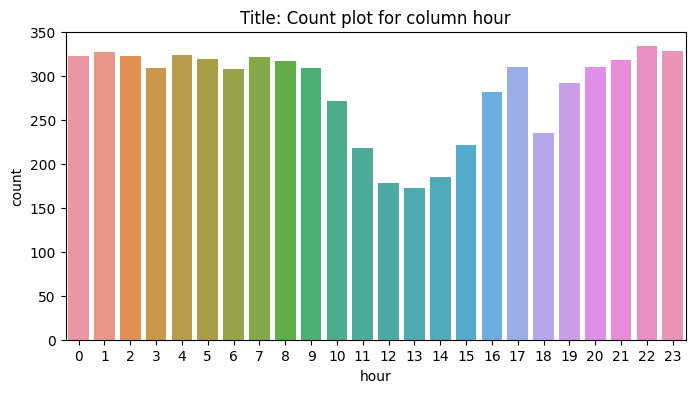

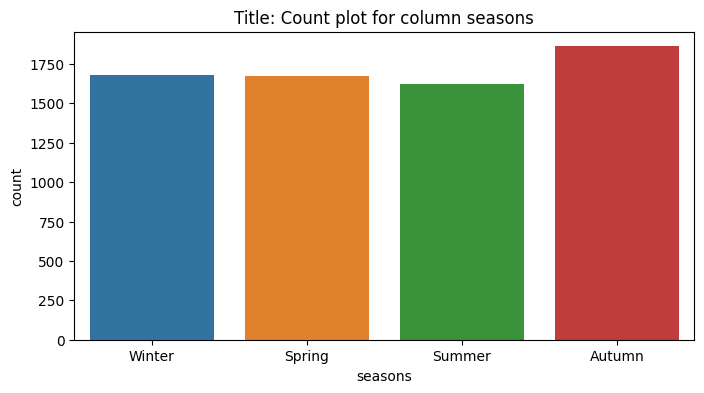

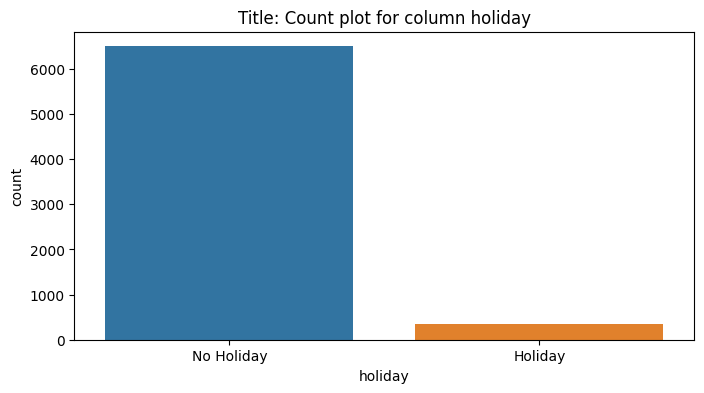

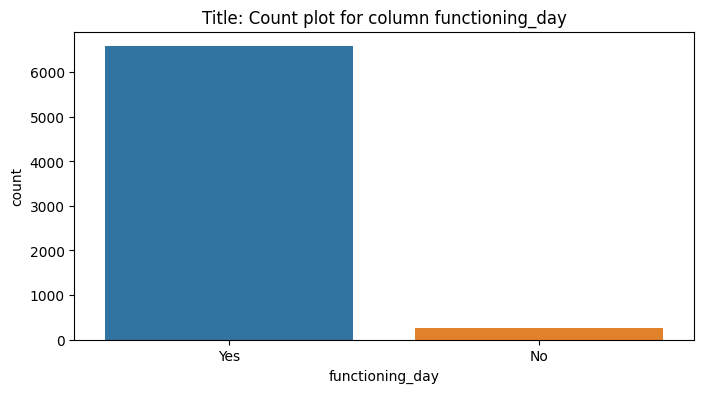

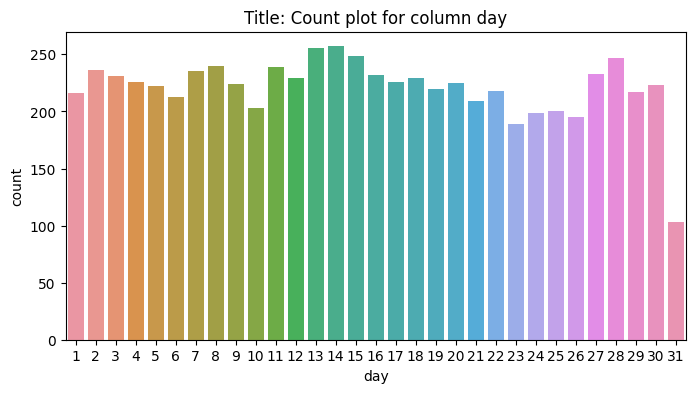

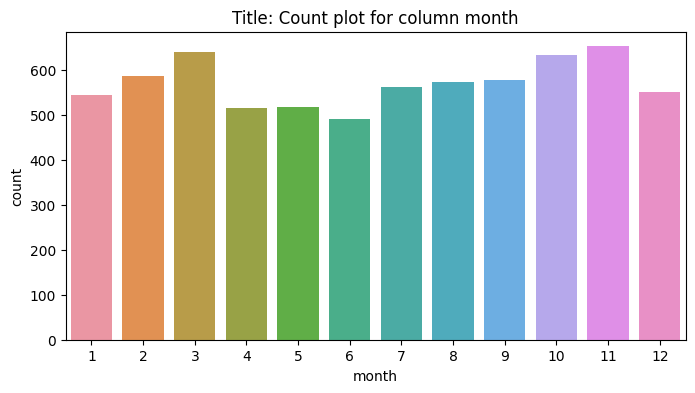

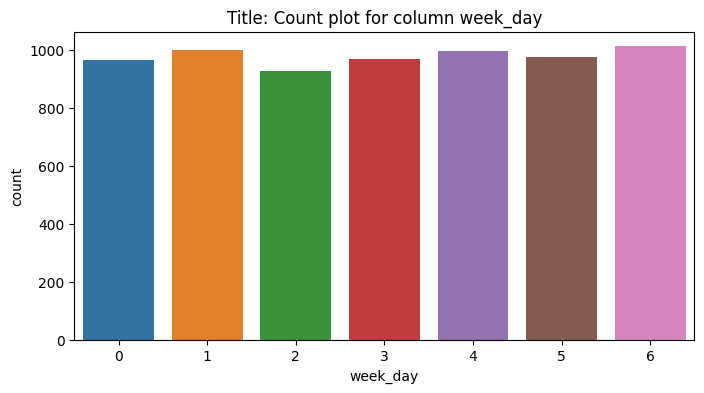

In [ ]:
#check distribution of all categorical features

for col in categorical_features:
  plt.figure(figsize=(8,4))
  plt.title(f'Title: Count plot for column {col}')
  sns.countplot(x = df[col])
  plt.show()
  print('\n')

Daily trend of bike count

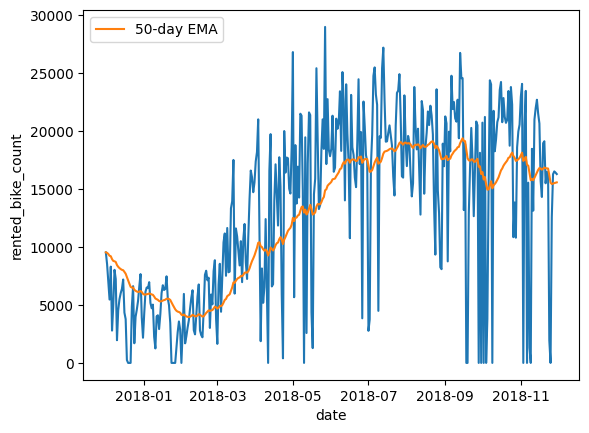

In [ ]:
#calculate sum of rented bike count, grouped by week
daily_trend = dft.groupby([pd.Grouper(key='date', freq='D')])['rented_bike_count'].sum().to_frame()
#span
spans = 50
daily_trend['EWM'] = daily_trend['rented_bike_count'].ewm(span=spans, adjust=False).mean()

sns.lineplot(data = daily_trend, x = 'date',y='rented_bike_count')
plt.plot(daily_trend['EWM'], label=f'{spans}-day EMA')
#add legend to plot
plt.legend(loc=2)
plt.show()

Daily trend seems too noisy

Weekly trend of bike count

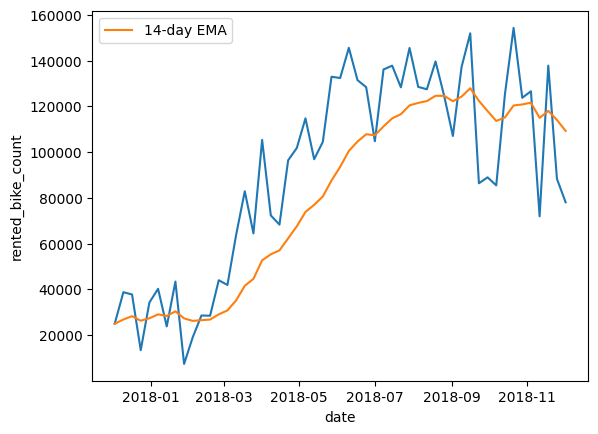

In [ ]:
#calculate sum of rented bike count, grouped by week
weekly_trend = dft.groupby([pd.Grouper(key='date', freq='W')])['rented_bike_count'].sum().to_frame()
#span
spans = 14
weekly_trend['EWM'] = weekly_trend['rented_bike_count'].ewm(span=spans, adjust=False).mean()

sns.lineplot(data = weekly_trend, x = 'date',y='rented_bike_count')
plt.plot(weekly_trend['EWM'], label=f'{spans}-day EMA')
#add legend to plot
plt.legend(loc=2)
plt.show()

Monthly trend

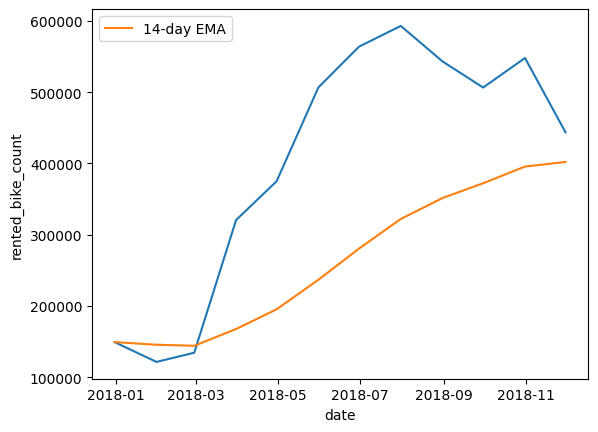

In [ ]:
#calculate sum of values, grouped by month
monthly_trend = dft.groupby([pd.Grouper(key='date', freq='M')])['rented_bike_count'].sum().to_frame()

#span
spans = 14

monthly_trend['EMA'] = monthly_trend['rented_bike_count'].ewm(span=spans, adjust=False).mean()
sns.lineplot(data = monthly_trend, x = 'date',y='rented_bike_count')

plt.plot(monthly_trend['EMA'], label=f'{spans}-day EMA')

#add legend to plot
plt.legend(loc=2)
plt.show()

#Bivariate analysis

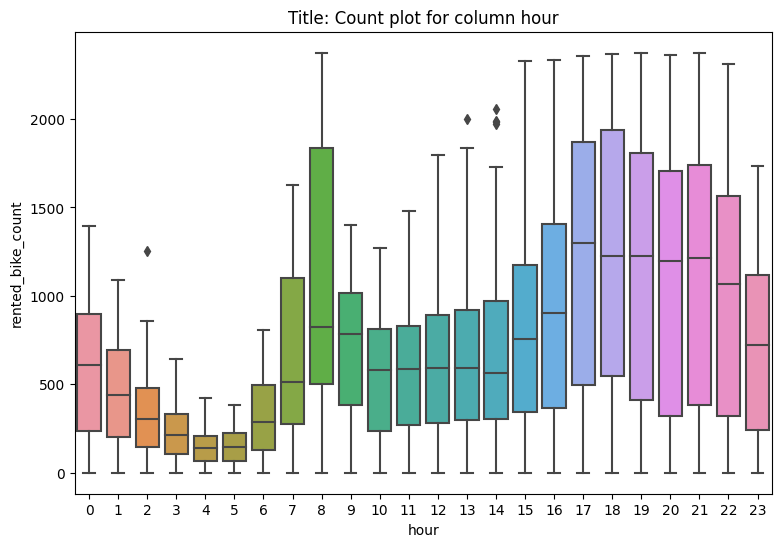

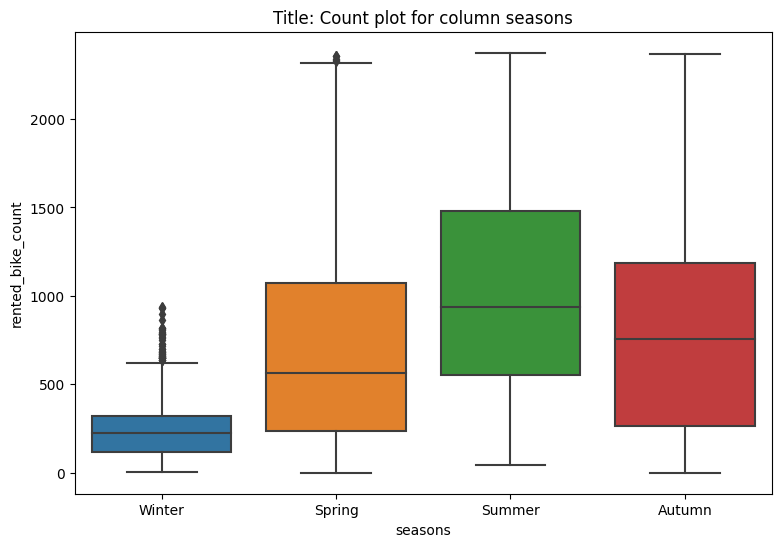

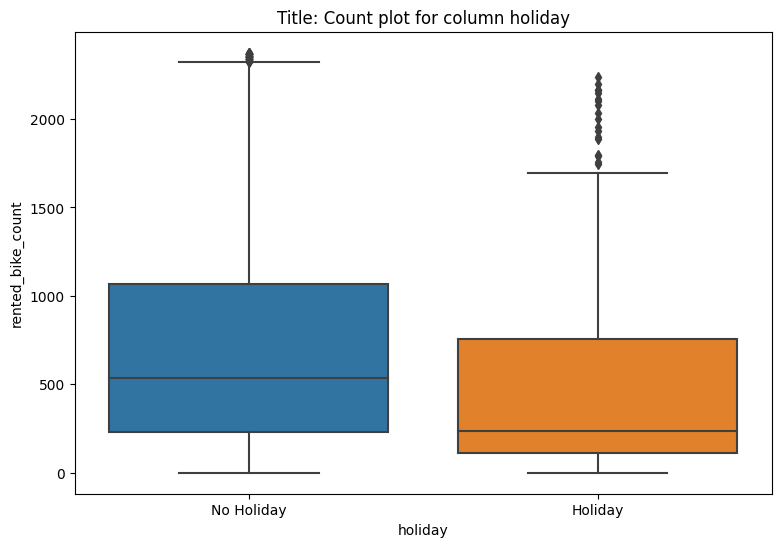

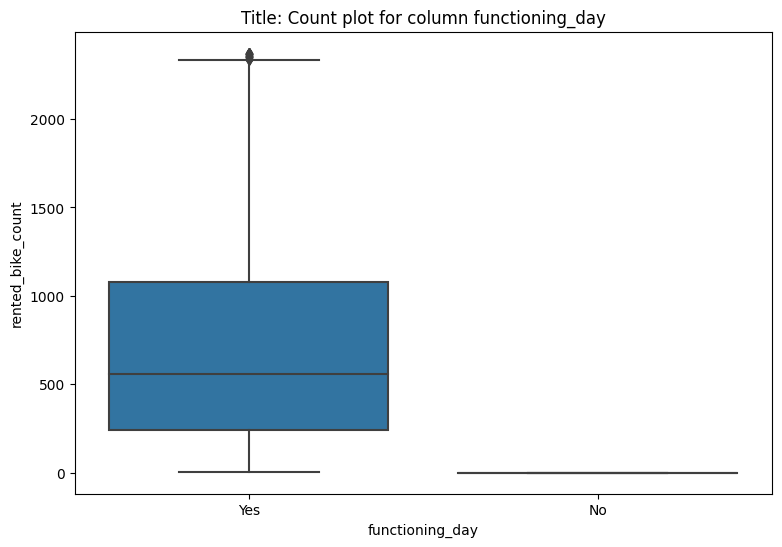

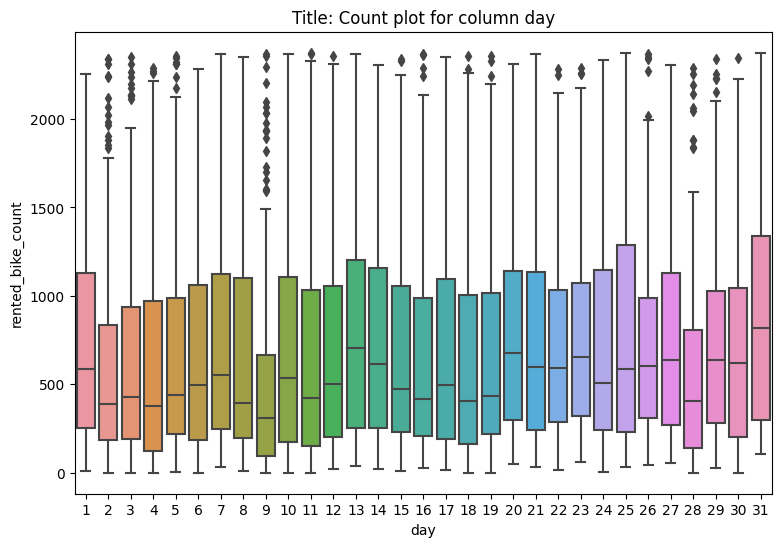

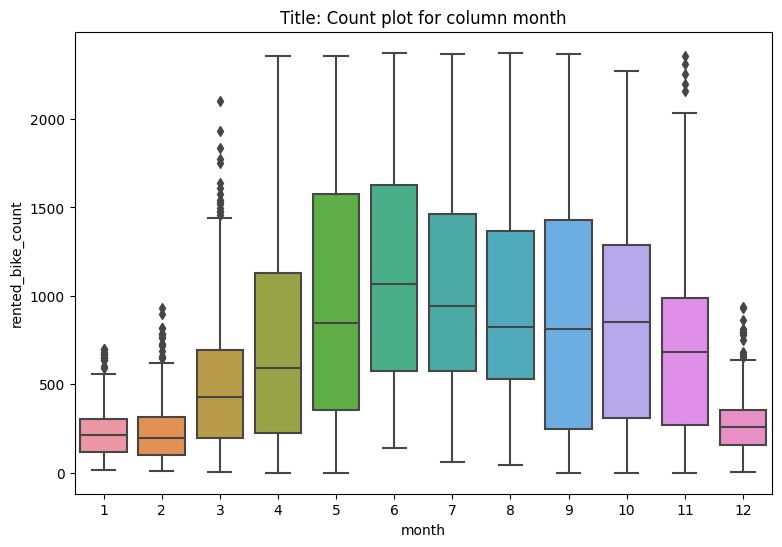

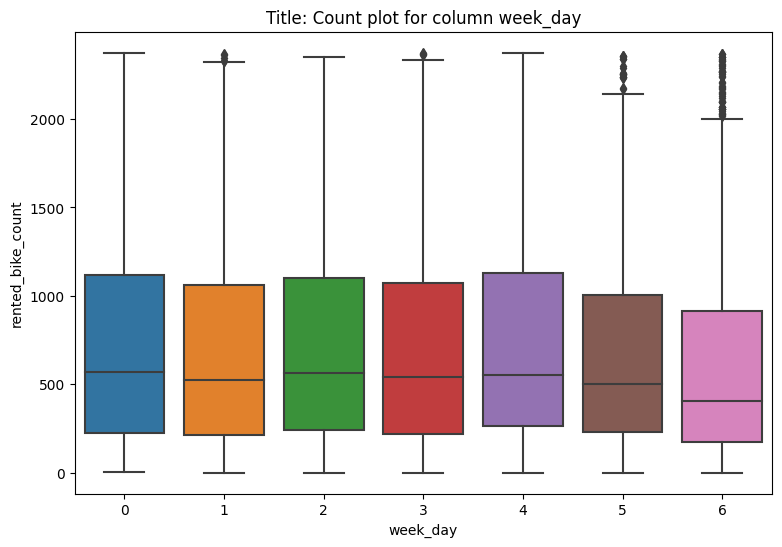

In [ ]:
#check relation between categorical features and dependent variable

for col in categorical_features:
  plt.figure(figsize=(9,6))
  plt.title(f'Title: Count plot for column {col}')
  sns.boxplot(x=df[col],y='rented_bike_count',data=df)
  print('\n')
  plt.show()

In [ ]:
#creating copy of df to do analysis
df2=df.copy()

In [ ]:
df2.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,seasons,holiday,functioning_day,day,month,week_day
0,254,0,-5.2,37,2.2,2000,-17.6,Winter,No Holiday,Yes,1,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,Winter,No Holiday,Yes,1,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,Winter,No Holiday,Yes,1,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,Winter,No Holiday,Yes,1,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,Winter,No Holiday,Yes,1,12,4


In [ ]:
df2['time_slot'] = df2['hour'].apply(convert_hour)

No of bikes rented according to time slot

      Findings : 
      1. Bikes are mostly rented at night time
      2. Second most time slot at which bike is rented.
      3. At afternoon least no of bikes are rented

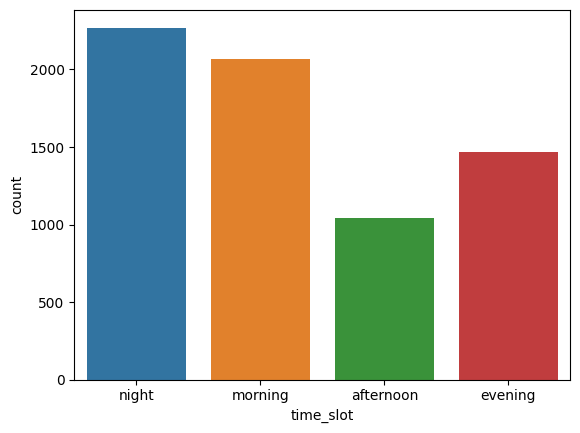

In [ ]:
sns.countplot(data = df2,x='time_slot')
plt.show()

Season and demand of bike

         It can be seen that demand of bike is in following order:
         Summer > Autumn > Spring > Winter
        


In [ ]:
season_demand = pd.DataFrame(data=df2.groupby('seasons')['rented_bike_count'].sum().reset_index())
season_demand


,seasons,rented_bike_count
0,Autumn,1498434
1,Spring,1202304
2,Summer,1700080
3,Winter,404912


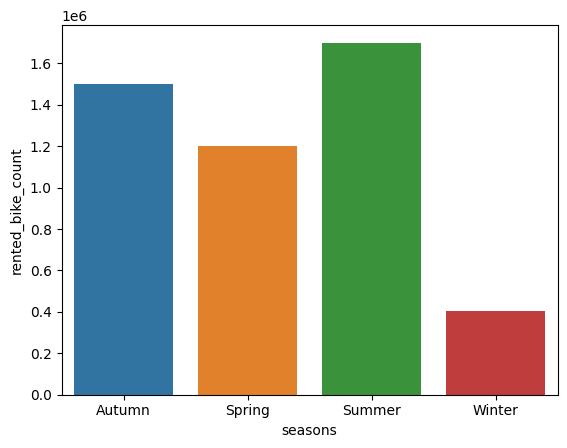

In [ ]:
sns.barplot(data = season_demand,x = 'seasons',y='rented_bike_count')
plt.show()

#Multivariate analysis

Relation between temperature and bike demand

Following are the relationship between temperature and demand of rental bike:
1. It can be seen that demand of bike increases with increase in temperature
2. When temperature is high demand for bike rental is more during evening.
3. When temperature is low demand for bike rental is during morning and night.      
        


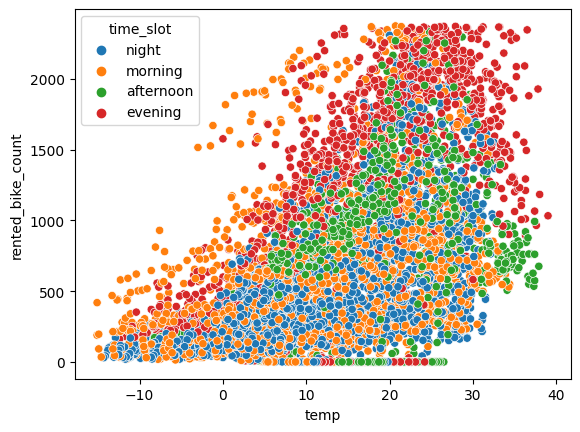

In [ ]:
sns.scatterplot(data = df2,x='temp',y='rented_bike_count',hue = 'time_slot' )
plt.show()

In [ ]:
min(df2['temp'])

-15.1

In [ ]:
df2['temp-range'] = pd.cut(df2['temp'], bins=range(-20,41,10), labels=[f'{l} to {l+10}' for l in range(-20,31,10)])

In [ ]:
xx = df2.groupby('temp-range').agg({'rented_bike_count': 'sum'}).reset_index()

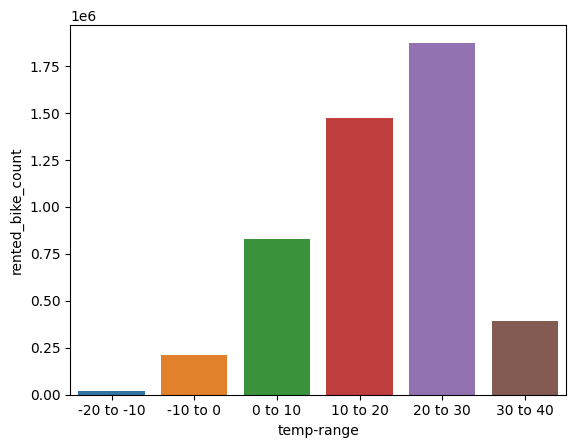

In [ ]:

sns.barplot(data = xx,x='temp-range',y='rented_bike_count')
plt.show()

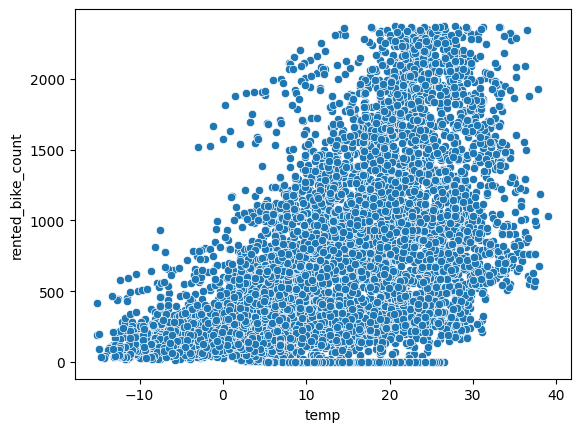

In [ ]:
sns.scatterplot(data = df2,x='temp',y='rented_bike_count')
plt.show()

In [ ]:
month_temp = pd.DataFrame(data=df2.groupby('month').agg(mean_temperature = ('temp','mean'),mean_bike_demand =('rented_bike_count','mean')).reset_index())
month_temp

,month,mean_temperature,mean_bike_demand
0,1,-2.123897,223.130515
1,2,-1.688245,228.781942
2,3,7.696094,500.864062
3,4,12.191667,726.635659
4,5,17.264865,978.391892
5,6,22.015714,1150.832653
6,7,27.613167,1055.275801
7,8,28.570280,949.487762
8,9,20.923744,877.984402
9,10,12.530538,867.196203


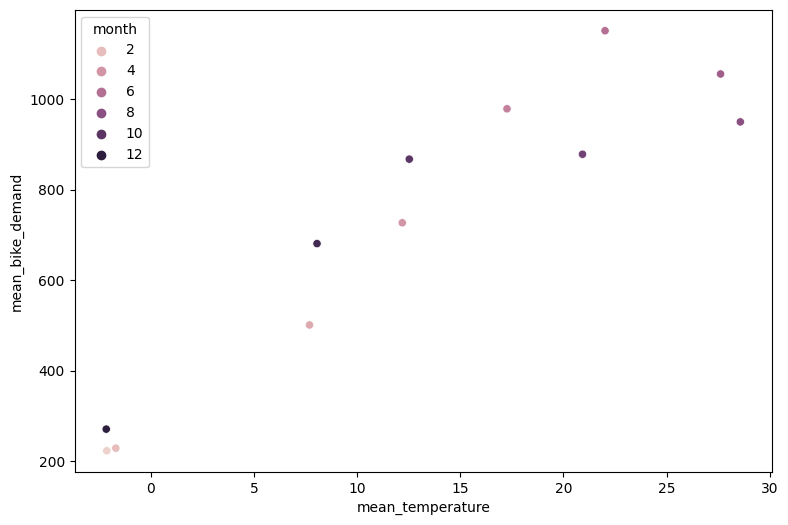

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=month_temp,y = 'mean_bike_demand',x = 'mean_temperature',hue = 'month')
plt.show()

Relationship between week day and demand for bike

It can be seen that almost at any day of the week demand is almost same

In [ ]:
weekday_demand = pd.DataFrame(data=df2.groupby('week_day')['rented_bike_count'].sum().reset_index())
weekday_demand


,week_day,rented_bike_count
0,0,712044
1,1,692600
2,2,684692
3,3,686043
4,4,732377
5,5,667385
6,6,630589


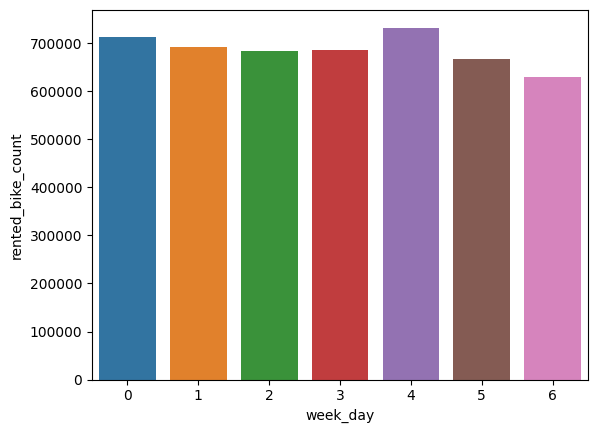

In [ ]:
sns.barplot(data = weekday_demand,x = 'week_day',y='rented_bike_count')

plt.show()

Relationship between month and bike demand

 Key finding related to monthly bike demand:
 1. Rental bike demand is low on January, February and December.
 2. Rental bike demand is very high between May to August. 

In [ ]:
month_demand = pd.DataFrame(data=df2.groupby('month')['rented_bike_count'].sum().reset_index())
month_demand

,month,rented_bike_count
0,1,121383
1,2,134295
2,3,320553
3,4,374944
4,5,506807
5,6,563908
6,7,593065
7,8,543107
8,9,506597
9,10,548068


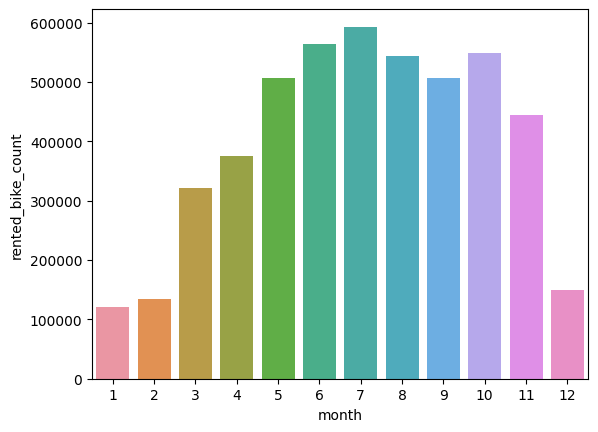

In [ ]:
sns.barplot(data = month_demand,x = 'month',y='rented_bike_count')

plt.show()

Relationship between visibilty and bike demand

There is no clear trend between visibility and bike demand 

In [ ]:
df2['visibility'].value_counts()

2000    1902
1995      28
1989      25
1996      23
1999      23
        ... 
613        1
676        1
439        1
395        1
1566       1
Name: visibility, Length: 1654, dtype: int64

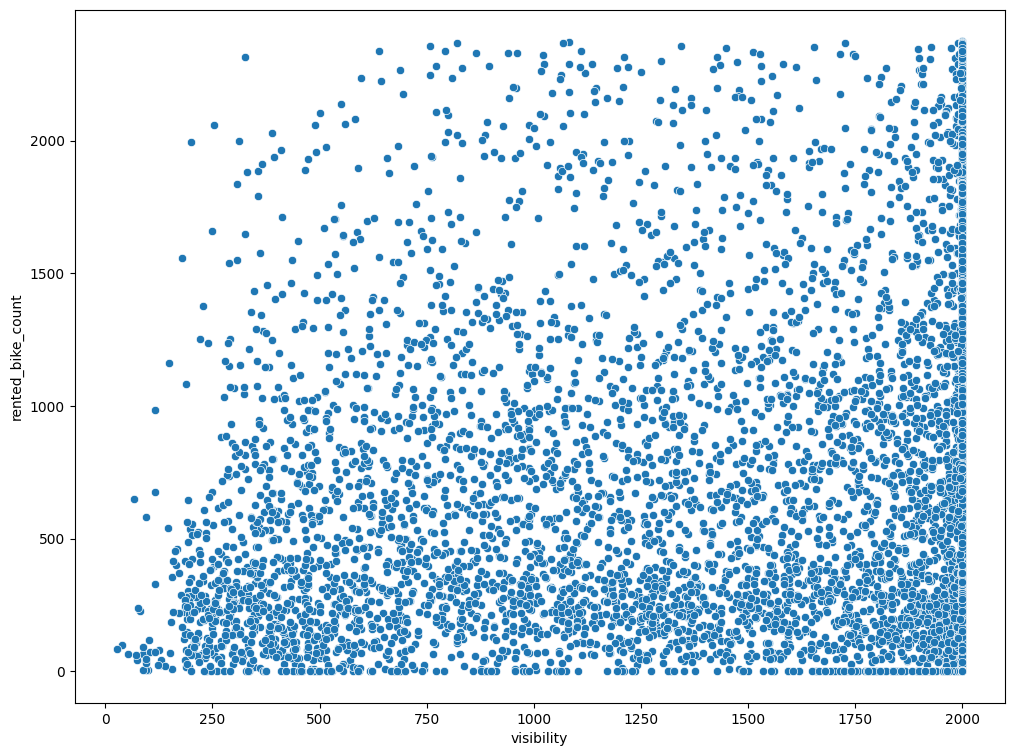

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = df2 , x='visibility',y ='rented_bike_count')
plt.show()

Relationship between wind_speed and bike demand

It can be seen that bike demand usually lowers when wind speed is higher.

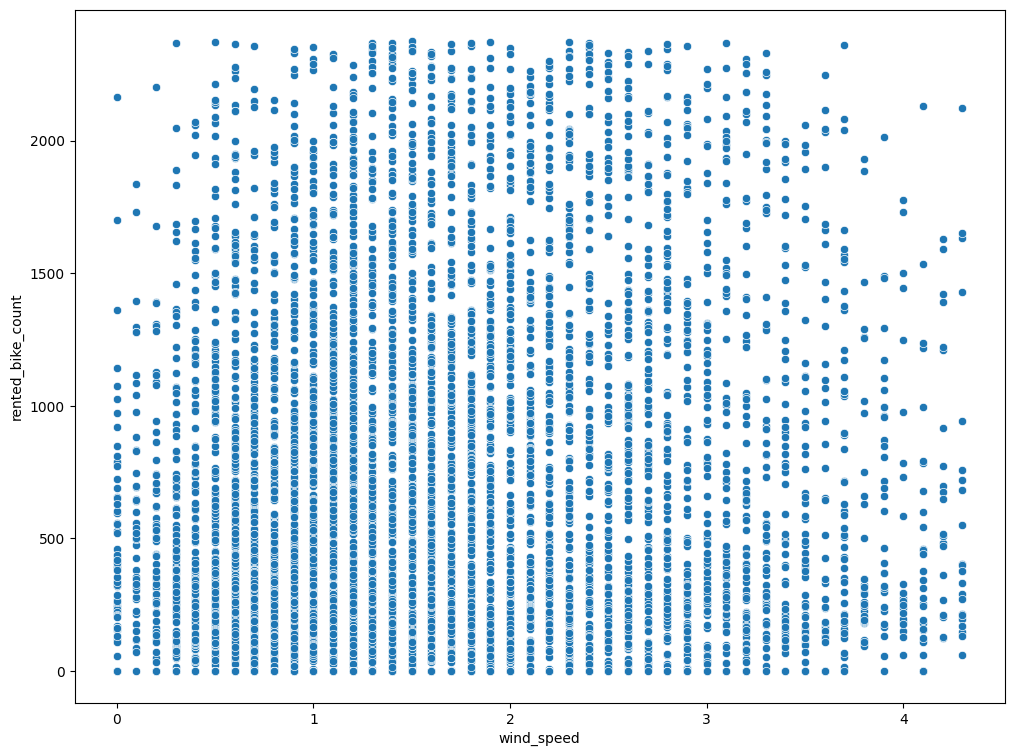

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = df2 , x='wind_speed',y ='rented_bike_count')
plt.show()

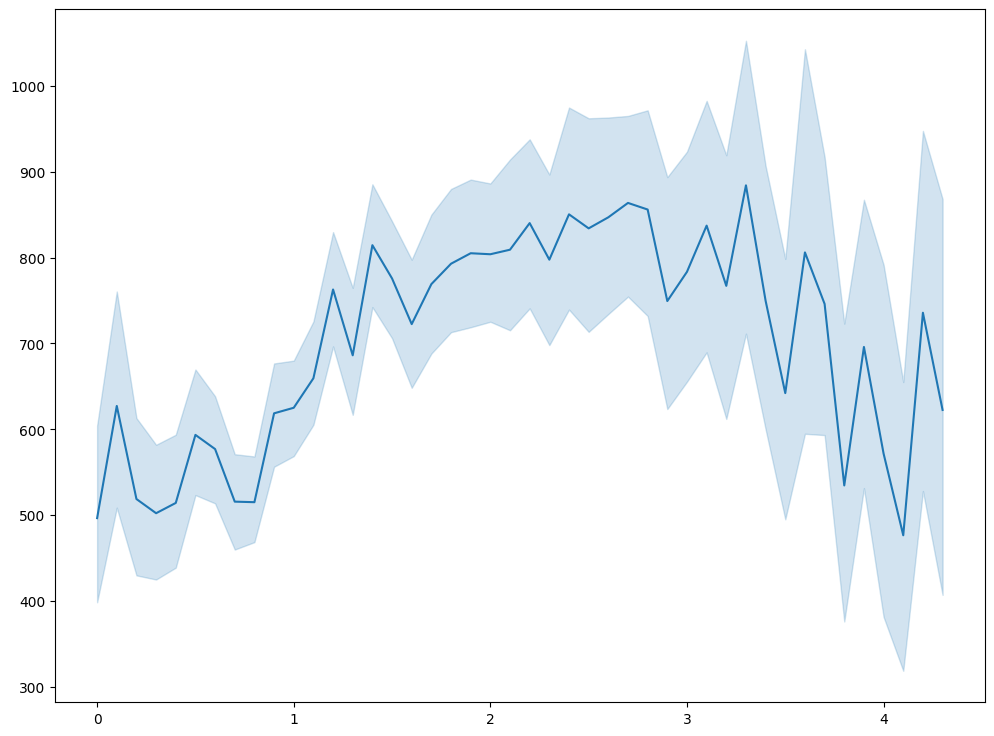

In [ ]:
plt.figure(figsize=(12,9))
sns.lineplot(data = df2 , x=df['wind_speed'].values,y =df['rented_bike_count'].values)
plt.show()

Relationship between hour of the day and bike demand

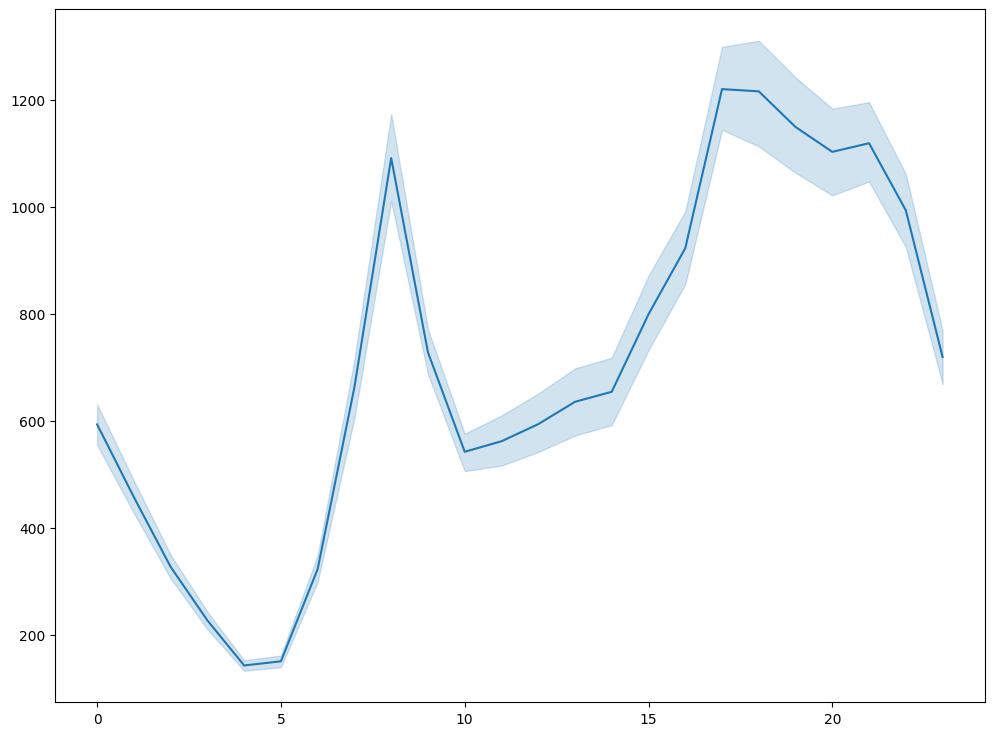

In [ ]:
plt.figure(figsize=(12,9))
sns.lineplot(data = df2 , x=df['hour'].values,y =df['rented_bike_count'].values)
plt.show()

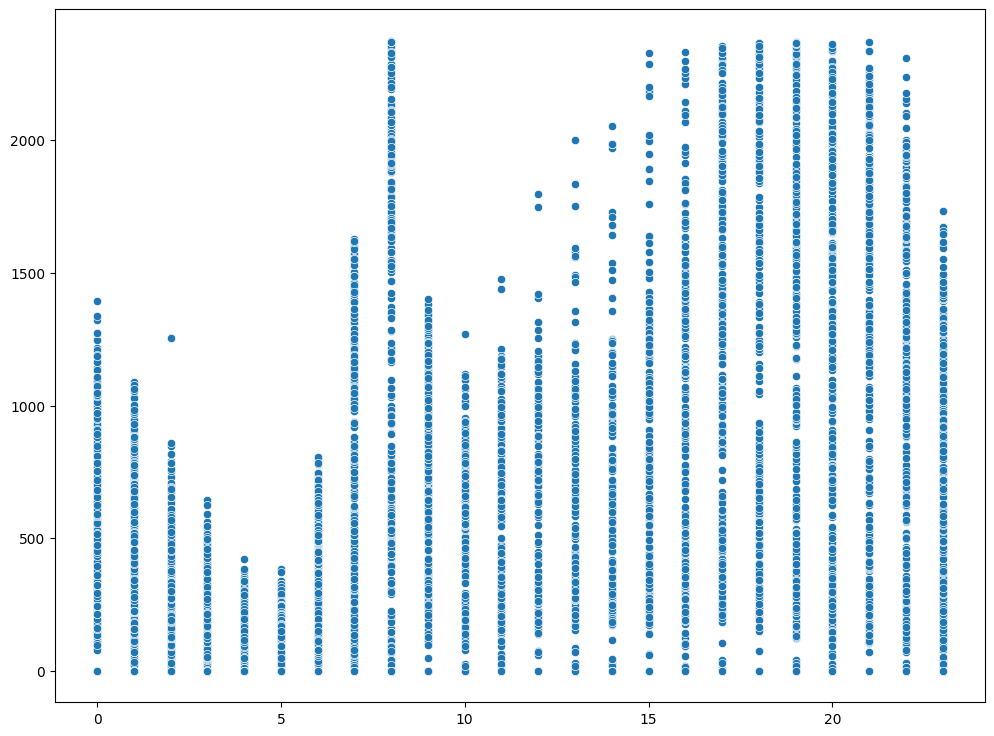

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = df2 , x=df['hour'].values,y =df['rented_bike_count'].values)
plt.show()

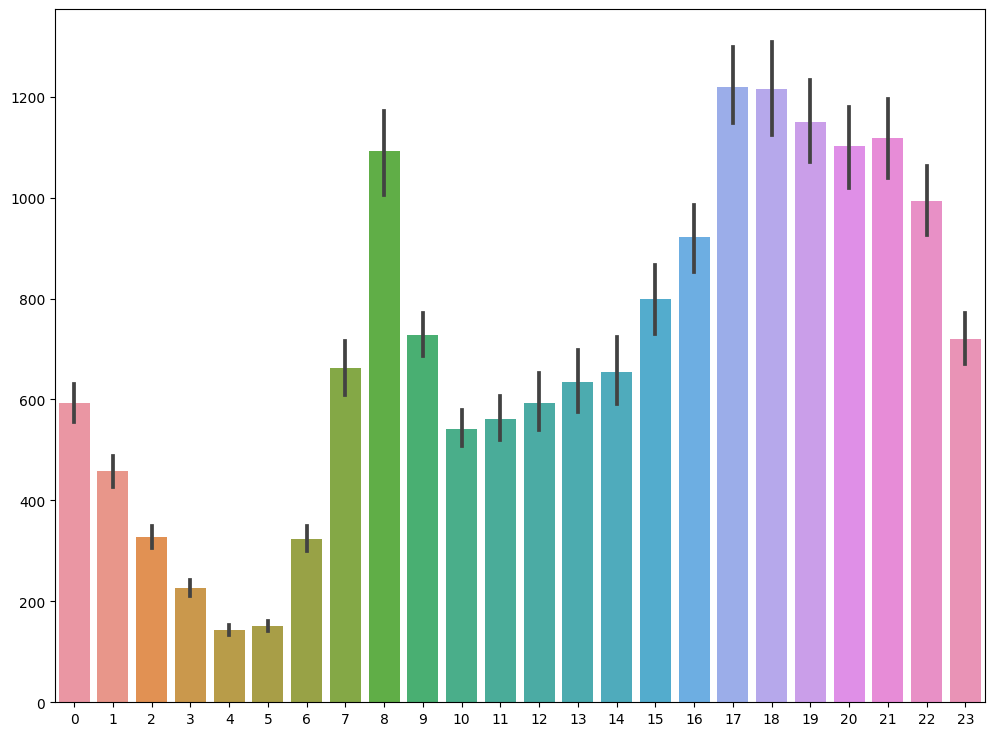

In [ ]:
plt.figure(figsize=(12,9))
sns.barplot(data = df2 , x=df['hour'].values,y =df['rented_bike_count'].values)
plt.show()

In [ ]:
hour_demand = pd.DataFrame(data=df2.groupby('hour')['rented_bike_count'].sum().reset_index())
hour_demand

,hour,rented_bike_count
0,0,191648
1,1,150003
2,2,105635
3,3,70108
4,4,46235
5,5,48162
6,6,99486
7,7,213521
8,8,345948
9,9,224994


It can be seen that bike demand rises after 5 AM and peaks at 8 AM, then again rises after 2 PM and peaks at 5PM then demand remain significantly above average demand 6PM and 11PM

That means at 11th hour of the day bike demand is most.

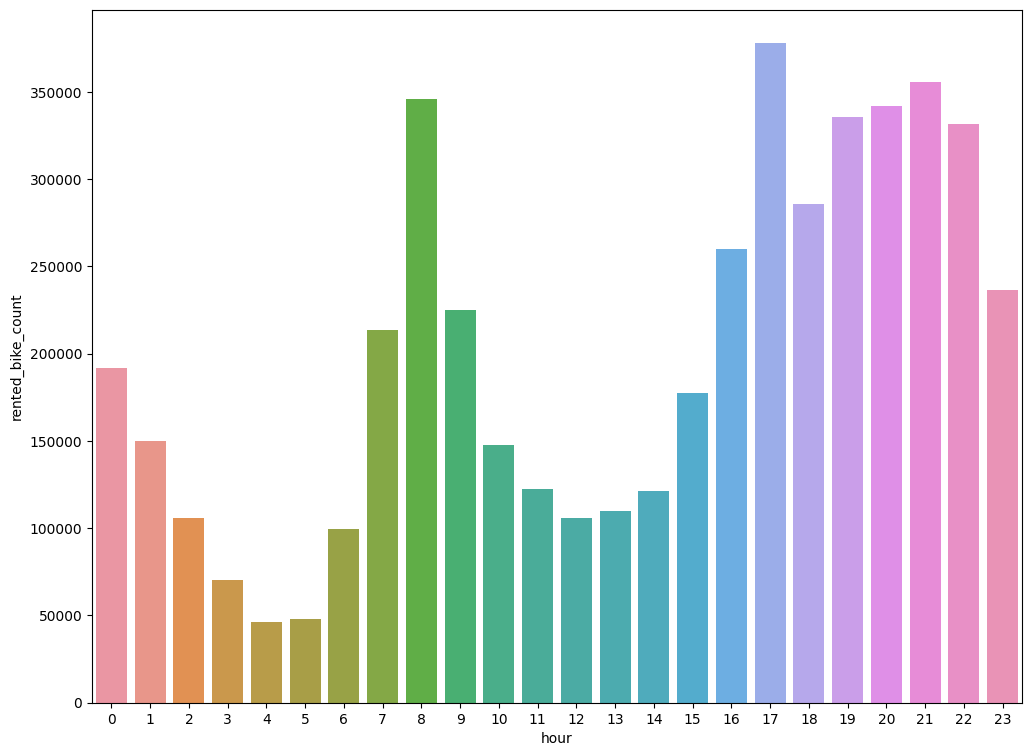

In [ ]:
plt.figure(figsize=(12,9))
sns.barplot(data = hour_demand , x='hour',y ='rented_bike_count')
plt.show()

#Checking correlation

In [ ]:
df.corr()

<ipython-input-202-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,day,month,week_day
rented_bike_count,1.000000,0.428133,0.556930,-0.079947,0.125332,0.134754,0.430806,0.040351,0.162383,-0.043543
hour,0.428133,1.000000,0.098287,-0.252365,0.305103,0.084985,-0.018785,-0.004292,0.005637,0.011946
temp,0.556930,0.098287,1.000000,0.261314,-0.041162,0.024883,0.927973,0.054276,0.217144,-0.018340
humidity,-0.079947,-0.252365,0.261314,1.000000,-0.296497,-0.477336,0.590533,-0.021357,0.101144,0.005507
wind_speed,0.125332,0.305103,-0.041162,-0.296497,1.000000,0.138939,-0.154974,-0.028058,-0.115850,-0.003829
visibility,0.134754,0.084985,0.024883,-0.477336,0.138939,1.000000,-0.150090,-0.103112,0.122017,-0.024123
dew_point_temperature,0.430806,-0.018785,0.927973,0.590533,-0.154974,-0.150090,1.000000,0.036303,0.219673,-0.020371
day,0.040351,-0.004292,0.054276,-0.021357,-0.028058,-0.103112,0.036303,1.000000,0.033780,-0.001393
month,0.162383,0.005637,0.217144,0.101144,-0.115850,0.122017,0.219673,0.033780,1.000000,0.013836
week_day,-0.043543,0.011946,-0.018340,0.005507,-0.003829,-0.024123,-0.020371,-0.001393,0.013836,1.000000


<ipython-input-203-d3d9857921e0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


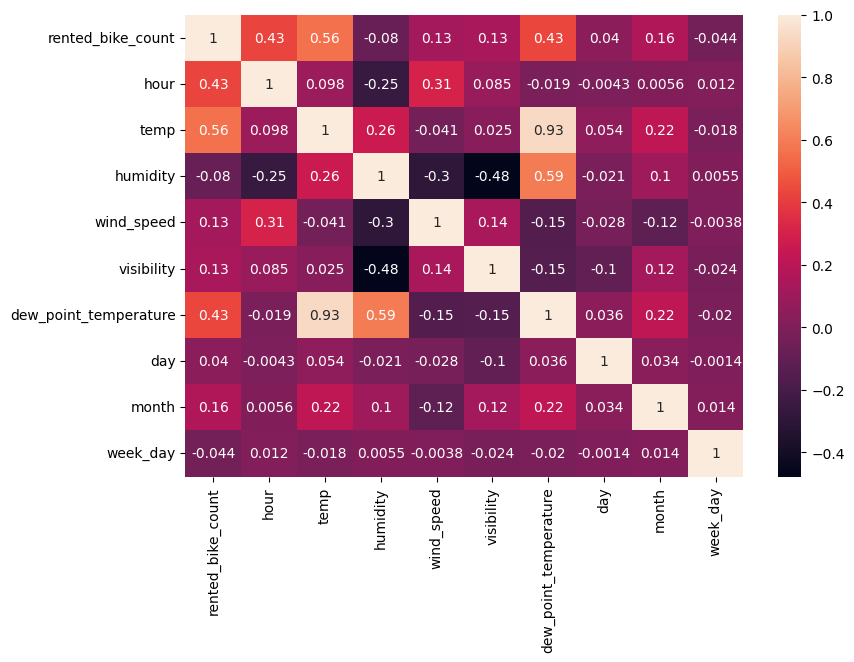

In [ ]:
#heatmap to visualise correlation
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
#removing dew point because of 91% correlation
df.drop(columns='dew_point_temperature',inplace=True)

#VIF analysis

In [ ]:
#remove dew point temperature from numerical features

numerical_features
numerical_features.remove('dew_point_temperature')

In [ ]:
# check multicollinearity, VIF must be less than 10

calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bike_count']]])

,variables,VIF
0,hour,3.683128
1,temp,2.497231
2,humidity,6.481123
3,wind_speed,4.186782
4,visibility,5.723289
5,day,3.735410
6,month,4.930334
7,week_day,3.126120


In [ ]:

print(f'Total final features for model : {len(numerical_features) + len(categorical_features)}')

print(f'Total numerical features : {len(numerical_features)}')

print(f'Total categorical features : {len(categorical_features)}')

Total final features for model : 12
Total numerical features : 5
Total categorical features : 7


In [ ]:
numerical_features

['rented_bike_count', 'temp', 'humidity', 'wind_speed', 'visibility']

In [ ]:
categorical_features

['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'week_day']

# Data pre-processing

#Categorical encoding

In [ ]:
#making copy of data frame
df1=df.copy()

In [ ]:
#reset index after removing outliers

df1=df1.reset_index()

In [ ]:
df1.drop(columns='index',inplace=True)

In [ ]:
df1.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,seasons,holiday,functioning_day,day,month,week_day
0,254,0,-5.2,37,2.2,2000,Winter,No Holiday,Yes,1,12,4
1,204,1,-5.5,38,0.8,2000,Winter,No Holiday,Yes,1,12,4
2,173,2,-6.0,39,1.0,2000,Winter,No Holiday,Yes,1,12,4
3,107,3,-6.2,40,0.9,2000,Winter,No Holiday,Yes,1,12,4
4,78,4,-6.0,36,2.3,2000,Winter,No Holiday,Yes,1,12,4


In [ ]:
df1.tail()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,seasons,holiday,functioning_day,day,month,week_day
6836,1003,19,4.2,34,2.6,1894,Autumn,No Holiday,Yes,30,11,4
6837,764,20,3.4,37,2.3,2000,Autumn,No Holiday,Yes,30,11,4
6838,694,21,2.6,39,0.3,1968,Autumn,No Holiday,Yes,30,11,4
6839,712,22,2.1,41,1.0,1859,Autumn,No Holiday,Yes,30,11,4
6840,584,23,1.9,43,1.3,1909,Autumn,No Holiday,Yes,30,11,4


In [ ]:
df1 = pd.get_dummies(data = df1,columns =categorical_features)

#Building ML model

In [ ]:
dependent_var = 'rented_bike_count'
independent_var = list(set(df1.columns.to_list()) -{dependent_var})

In [ ]:
print(len(independent_var))

86


Tried all type of transformation but found log transformation giving best result for model

In [ ]:
X = df1[independent_var]
y =np.log(df1[dependent_var]+1)

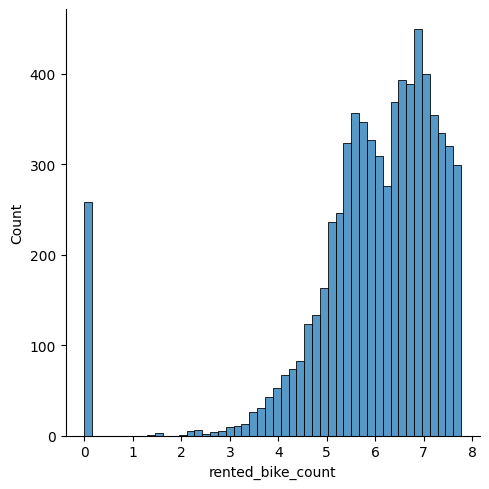

In [ ]:
sns.displot(y)

After yeo johnson transformation accuracy reduced to 83.5%, so reverting back to log transformation

In [ ]:
# apply yeo johnson accuracy reduced 
#from scipy import stats

#X = df1[independent_var]
#m , lamda= stats.yeojohnson(df1[dependent_var])
#y = m

In [ ]:
y

0       5.541264
1       5.323010
2       5.159055
3       4.682131
4       4.369448
          ...   
6836    6.911747
6837    6.639876
6838    6.543912
6839    6.569481
6840    6.371612
Name: rented_bike_count, Length: 6841, dtype: float64

#Data Dictionay (continued)


**X_train, X_test, y_train, y_test** : Split of dataframe into test and train set, dataframe after 20%

**convert_log_toactual** : It is a function that converts log transformed value of "y" into actual value

**reg** = It is Linear regression model

**r2_score_lr** : It contains r2 score of reg (Linear regression) model.

**aj_r2_score_lr** : It contains adjusted r2 score of reg (Linear regression) model.

**lasso** = It is Lasso linear regression model

**r2_score_lasso**: It contains r2 score of Lasso (Linear regression) model.

**adj_r2_score_lasso** : It contains adjusted r2 score of reg (Linear regression) model.

**lasso_regressor** : It is It is lasso linear regression model with hyperparameter tuning with CV

**lasso_optimum_model** : It is lasso ML model with best estimator lasso linear regression model with hyperparameter tuning with CV

**r2_score_lasso_cv** : It contains r2 score of Lasso (Linear regression) model with cv

**aj_r2_score_lasso_cv** : It contains ajusted r2 score of Lasso (Linear regression) model with cv

**rf** : It is a random forest regessor ML model.

**rf_cv** : It is a random forest regessor ML model with hyper parameter tuning with CV

**rf_cv_optimal_model** : It is random forest ML model with best estimator of random forest regression model with hyperparameter tuning with CV

**r2_rf_cv** : It contains r2 score of random forest regessor ML model with hyper parameter tuning with CV

**xgb** : It is a XG Boost regressor ML model.

**r2_xgb** : It is r2 score of xgb model

**adj_r2_xgb** : It is adjusted r2 score of xgb model

**xgb_cv**: It is xgb ML model with hyper parameter tuning with CV  

**xgb_cv_optimal**: It is xgb_cv model with best estimator

**r2_xgb_cv** : It is r2 score of xgb_cv model.

**aj_r2_xgb_cv** : It is adjusted r2 score of xgb_cv_model







In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5472, 86) (5472,)
(1369, 86) (1369,)


Revert np log value

In [ ]:
np.log(5)+1

2.6094379124341005

In [ ]:
np.exp(2.6094379124341005-1)

5.000000000000001

In [ ]:
def convert_log_toactual(input_pred):
  '''reverse log transformed value to actual value'''
  y_actual = np.exp(input_pred-1)
  return y_actual  

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Baseline Model

In [ ]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#regressor coefficient

reg.coef_

array([ 5.39605457e+10,  1.90221272e+12,  5.39605457e+10,  1.80545873e+12,
       -1.18736420e+13, -9.19670105e-01, -1.93386078e-02, -9.07892887e+12,
        1.80545873e+12,  1.90221272e+12,  1.90221272e+12,  1.90221272e+12,
        1.90221272e+12,  1.90221272e+12, -2.37746597e+13,  1.90221272e+12,
        2.93589898e+12,  1.90221272e+12,  1.80545873e+12,  1.90221272e+12,
       -1.23376468e+12,  1.90221272e+12,  1.80545873e+12,  1.90221272e+12,
        5.39605457e+10,  1.80545873e+12, -9.53099453e+12,  5.39605457e+10,
        1.90221272e+12, -2.37746597e+13, -9.07892887e+12,  5.39605457e+10,
        1.90221272e+12, -9.07892887e+12,  5.39605457e+10,  2.93589898e+12,
        1.30099005e+13,  1.90221272e+12,  1.90221272e+12,  1.80545873e+12,
        1.90221272e+12,  1.90221272e+12, -1.23046875e-01,  1.90221272e+12,
       -1.23376468e+12,  1.80545873e+12, -1.18736420e+13,  1.80545873e+12,
        1.90221272e+12,  1.80545873e+12,  1.80545873e+12,  1.90221272e+12,
        1.90221272e+12,  

In [ ]:
#intercept

reg.intercept_

15940870272302.027

In [ ]:
#score on train set

reg.score(X_train,y_train)

0.9073616652771558

In [ ]:
#score on test set

reg.score(X_test,y_test)

0.9091248577456872

In [ ]:
y_pred_lr = reg.predict(X_test) 

In [ ]:
y_pred_lr

array([6.69335938, 6.78125   , 4.71875   , ..., 7.27929688, 6.15820312,
       7.26757812])

In [ ]:
y_pred_lr_actual = convert_log_toactual(y_pred_lr)
y_pred_lr_actual

array([296.88930978, 324.16414245,  41.21284584, ..., 533.41347559,
       173.85178485, 527.19902036])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE= mean_squared_error((y_test), (y_pred_lr))

print("MSE :" , MSE)

RMSE= np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.21248868470534213
RMSE : 0.4609649495410059


In [ ]:
from sklearn.metrics import r2_score
r2_score_lr = r2_score((y_test),(y_pred_lr))
print("R2 :" ,r2_score_lr)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9091248577456872
Adjusted R2 :  0.9030287093573324


In [ ]:
r2_score_lr
aj_r2_score_lr = 1-(1-r2_score((y_test), (y_pred_lr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_score_lr

0.9030287093573324

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.90681365945677

In [ ]:
lasso.score(X_test, y_test)

0.9100421085402626

In [ ]:
lasso.coef_

array([-2.56467063e-02, -5.75175649e-02,  0.00000000e+00,  3.52807647e-01,
       -2.74960192e-01, -8.57064753e-01, -0.00000000e+00,  3.24352134e-01,
       -1.28213288e+00,  4.08329310e-02, -0.00000000e+00,  0.00000000e+00,
       -1.17325401e-02, -1.50228887e-01,  2.03567073e-01, -0.00000000e+00,
        6.36570587e+00,  1.16954162e-01,  5.65377364e-01, -5.55241591e-02,
        1.00447563e-01,  0.00000000e+00, -3.47892132e-03, -5.97814997e-02,
       -1.98613945e-01,  5.04103581e-01, -5.34788793e-01,  4.15915261e-02,
        2.35980452e-02, -2.69444166e-01,  0.00000000e+00, -1.52522566e-02,
        2.71163340e-03, -1.38365324e-01,  1.01263429e-01, -2.00207824e-01,
       -1.83683692e-03,  0.00000000e+00, -0.00000000e+00, -2.27931939e-01,
       -1.67829612e-01, -1.86771158e-02, -7.78733084e-02, -4.52690366e-02,
       -9.49159355e-02,  3.04862437e-01,  1.19267858e-01, -0.00000000e+00,
       -0.00000000e+00, -5.29459639e-01, -4.03398633e-02,  1.75608246e-02,
        2.80712175e-02,  

In [ ]:
lasso.intercept_

-0.5454384851735812

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
#actual predicted value
y_pred_lasso_actual = convert_log_toactual(y_pred_lasso)
y_pred_lasso_actual

array([292.12721789, 310.43999273,  43.46118592, ..., 535.6820853 ,
       167.21335228, 519.07367891])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_lasso))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.2103439242125464
RMSE : 0.4586326680607765


In [ ]:
from sklearn.metrics import r2_score
r2_score_lasso= r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2_score_lasso)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9100421085402626
Adjusted R2 :  0.9040074917964737


In [ ]:
r2_score_lasso
adj_r2_score_lasso = 1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))


Lasso regression model Hyper parameter tuning

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter=30000)
parameters = {'alpha': [0.001,0.01,0.1,1,10,100,1000,10000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=30000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.2298650264996489


In [ ]:
lasso_optimum_model = lasso_regressor.best_estimator_
lasso_optimum_model

Lasso(alpha=0.001, max_iter=30000)

In [ ]:
lasso_optimum_model.score(X_train,y_train)

0.90681365945677

In [ ]:
lasso_optimum_model.score(X_test,y_test)

0.9100421085402626

In [ ]:
y_pred_lasso_cv = lasso_optimum_model.predict(X_test)

In [ ]:
y_pred_lasso_cv_actual = convert_log_toactual(y_pred_lasso_cv)
y_pred_lasso_cv_actual

array([292.12721789, 310.43999273,  43.46118592, ..., 535.6820853 ,
       167.21335228, 519.07367891])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_lasso_cv))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.2103439242125464
RMSE : 0.4586326680607765


In [ ]:
from sklearn.metrics import r2_score
r2_score_lasso_cv = r2_score((y_test),(y_pred_lasso_cv))
print("R2 :" ,r2_score_lasso_cv)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9100421085402626
Adjusted R2 :  0.9040074917964737


In [ ]:
r2_score_lasso_cv
aj_r2_score_lasso_cv = 1-(1-r2_score((y_test), (y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_score_lasso_cv

0.9040074917964737

Random forest reggresion model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
rf.score(X_train,y_train)

0.7260714392059255

In [ ]:
rf.score(X_test,y_test)

0.7209605706898132

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_rf))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.6524635873374598
RMSE : 0.8077521818834411


In [ ]:
from sklearn.metrics import r2_score
r2_rf = r2_score((y_test),(y_pred_rf))
print("R2 :" ,r2_rf)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7209605706898132
Adjusted R2 :  0.7022418570231392


In [ ]:
r2_rf
aj_r2_rf = 1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Random forest regression model hyper parameter tuning

In [ ]:
#Cross validation using grid search cv


from sklearn.model_selection import GridSearchCV

parameters_dict = {
    'n_estimators' : [600,800],
    'max_depth':[11,13],
    'min_samples_split' : [3,5]
    }
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf,param_grid = parameters_dict,cv = 5,verbose = 2)
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  17.4s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  14.7s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  14.6s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  14.7s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  14.5s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  21.3s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  18.7s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  19.0s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  21.9s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  18.3s
[CV] END max_depth=11, min_samples_split=5, n_estimators=600; total time=  14.0s
[CV] END max_depth=11, min_samples_split=5, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [11, 13], 'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             verbose=2)

In [ ]:
rf_cv_optimal_model = rf_cv.best_estimator_
rf_cv_optimal_model

#1st attempt

#RandomForestRegressor(max_depth=9, min_samples_split=5, n_estimators=50,verbose=2) first instance
#parameters_dict = {
    #'n_estimators' : [50,100,150,200],
    #'max_depth':[3,5,7,9],
    #'min_samples_split' : [2,3,5,7],
    #'verbose' : [2]
    #}

#RandomForestRegressor(max_depth=13, min_samples_split=3, n_estimators=70)
#RandomForestRegressor(max_depth=13, min_samples_split=3, n_estimators=800)

RandomForestRegressor(max_depth=13, min_samples_split=3, n_estimators=800)

In [ ]:
#two percent increase in accuracy w.r.t. to lasso cv
 
rf_cv_optimal_model.score(X_train,y_train)

0.9599761583249946

In [ ]:
#accuracy decreased by 0.5 % w.r.t to lasso cv 

rf_cv_optimal_model.score(X_test,y_test)

0.9292491915121468

In [ ]:
y_pred_rf_cv = rf_cv_optimal_model.predict(X_test)

In [ ]:
y_pred_rf_cv_actual = convert_log_toactual(y_pred_rf_cv)
y_pred_rf_cv_actual

array([278.63730113, 422.36284356,  53.47327651, ..., 481.95439262,
       131.53587196, 477.91986932])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_rf_cv))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.16543298711271087
RMSE : 0.4067345413321948


In [ ]:
from sklearn.metrics import r2_score
r2_rf_cv = r2_score((y_test),(y_pred_rf_cv))
print("R2 :" ,r2_rf_cv)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rf_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9292491915121468
Adjusted R2 :  0.9245030374326184


In [ ]:
r2_rf_cv
aj_r2_rf_cv = 1-(1-r2_score((y_test), (y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_rf_cv

0.9040074917964737

XG boost ML model

In [ ]:
import xgboost as xg

In [ ]:
xgb= xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 800)

xgb.fit(X_train, y_train)

[16:34:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
xgb.score(X_train, y_train)

0.9999908271014973

In [ ]:
xgb.score(X_test, y_test)

0.9623818163793219

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
y_pred_xgb

array([6.7274923, 7.029204 , 4.8392587, ..., 7.3896365, 6.3218412,
       7.07194  ], dtype=float32)

In [ ]:
#actual predicted value
y_pred_xgb_actual = convert_log_toactual(y_pred_xgb)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_xgb))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.08796066955463389
RMSE : 0.296581640623006


In [ ]:
from sklearn.metrics import r2_score
r2_xgb = r2_score((y_test),(y_pred_xgb))
print("R2 :" ,r2_xgb)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9623818163793219
Adjusted R2 :  0.9598582876808989


In [ ]:
r2_xgb
aj_r2_xgb = 1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_xgb

0.9598582876808989

XG boost regression model hyper parameter tuning

In [ ]:
#Cross validation using grid search cv

from sklearn.model_selection import GridSearchCV

parameters_dict = {
    'n_estimators' : [600,700,800,900,1000,1200,1400]
    }
xgb= xg.XGBRegressor(objective ='reg:squarederror')
xgb_cv = GridSearchCV(xgb,param_grid = parameters_dict,cv = 5,verbose = 2)
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ...................................n_estimators=600; total time=  12.3s
[CV] END ...................................n_estimators=600; total time=  12.3s
[CV] END ...................................n_estimators=600; total time=  12.4s
[CV] END ...................................n_estimators=600; total time=  12.3s
[CV] END ...................................n_estimators=600; total time=  12.3s
[CV] END ...................................n_estimators=700; total time=  13.9s
[CV] END ...................................n_estimators=700; total time=  14.0s
[CV] END ...................................n_estimators=700; total time=  13.9s
[CV] END ...................................n_estimators=700; total time=  16.2s
[CV] END ...................................n_estimators=700; total time=  13.8s
[CV] END ...................................n_estimators=800; total time=  14.9s
[CV] END ...................................n_est

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'n_estimators': [600, 700, 800, 900, 1000, 1200,
                                          1400]},
             verbose=2)

In [ ]:
#best params for XG boost
xgb_cv_optimal = xgb_cv.best_estimator_
xgb_cv_optimal

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Score for train set

xgb_cv_optimal.score(X_train, y_train)

0.9999955416667952

In [ ]:
#Score for test set

xgb_cv_optimal.score(X_test, y_test)

0.9623945384352065

In [ ]:
y_pred_xgb_cv = xgb_cv_optimal.predict(X_test)

In [ ]:
y_pred_xgb_cv_actual = convert_log_toactual(y_pred_xgb_cv)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_xgb_cv))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.08793092222379495
RMSE : 0.2965314860580491


In [ ]:
from sklearn.metrics import r2_score
r2_xgb_cv = r2_score((y_test),(y_pred_xgb_cv))
print("R2 :" ,r2_xgb)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9623818163793219
Adjusted R2 :  0.9598718631664294


In [ ]:
r2_xgb_cv
aj_r2_xgb_cv = 1-(1-r2_score((y_test), (y_pred_xgb_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_xgb_cv

0.9598718631664294

# Creating data frame name of ML model, r2 score, adjusted r2 score

In [ ]:
adj_r2_score_lasso

0.9040074917964737

In [ ]:
score_df = pd.DataFrame()
score_df['name_of_model'] = ['linear regression','lasso regression','lasso regression cv','random forest','random forest cv','xg boost','xg boost cv']
score_df['r2_score'] = [r2_score_lr,r2_score_lasso,r2_score_lasso_cv,r2_rf,r2_rf_cv,r2_xgb,r2_xgb_cv]
score_df['adj_r2_score'] = [aj_r2_score_lr,adj_r2_score_lasso,aj_r2_score_lasso_cv,aj_r2_rf,aj_r2_rf_cv,aj_r2_xgb,aj_r2_xgb_cv]

In [ ]:
score_df

,name_of_model,r2_score,adj_r2_score
0,linear regression,0.909125,0.903029
1,lasso regression,0.910042,0.904007
2,lasso regression cv,0.910042,0.904007
3,random forest,0.720961,0.702242
4,random forest cv,0.929249,0.904007
5,xg boost,0.962382,0.959858
6,xg boost cv,0.962395,0.959872


# Feature Importance

Feature importance for XGBoost model

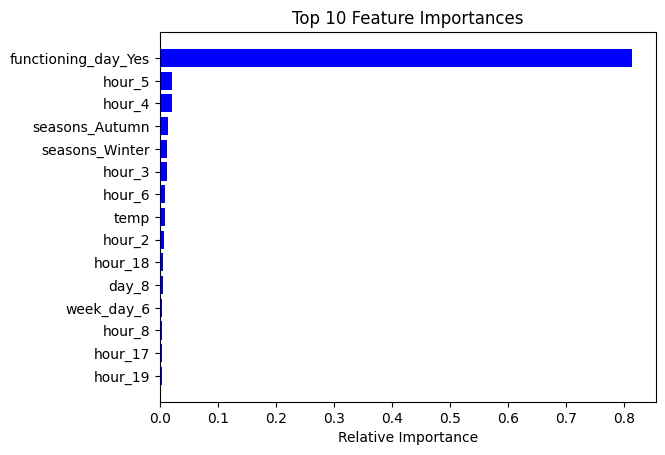

In [ ]:
#Calculate feature importance using inbuilt scikit-learn method

features = X.columns
importances = xgb_cv_optimal.feature_importances_
indices = np.argsort(importances)
top_indices = indices[-15:] # Select the top 10 features
top_features = [features[i] for i in top_indices]
top_importances = importances[top_indices]

plt.title('Top 10 Feature Importances')
plt.barh(range(len(top_indices)), top_importances, color='b', align='center')
plt.yticks(range(len(top_indices)), top_features)
plt.xlabel('Relative Importance')
plt.show()


Feature importance using SHAP

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(xgb_cv_optimal)
shap_values = explainer.shap_values(X_test)
feature_names = X.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance.head(10)

#shap.summary_plot(shap_values, X_test, plot_type="bar")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


,col_name,feature_importance_vals
16,functioning_day_Yes,0.461158
75,temp,0.437722
5,humidity,0.118451
68,hour_5,0.114444
8,hour_4,0.110866
59,hour_3,0.080432
26,seasons_Winter,0.079022
55,seasons_Autumn,0.063287
24,week_day_6,0.056633
49,hour_6,0.052241


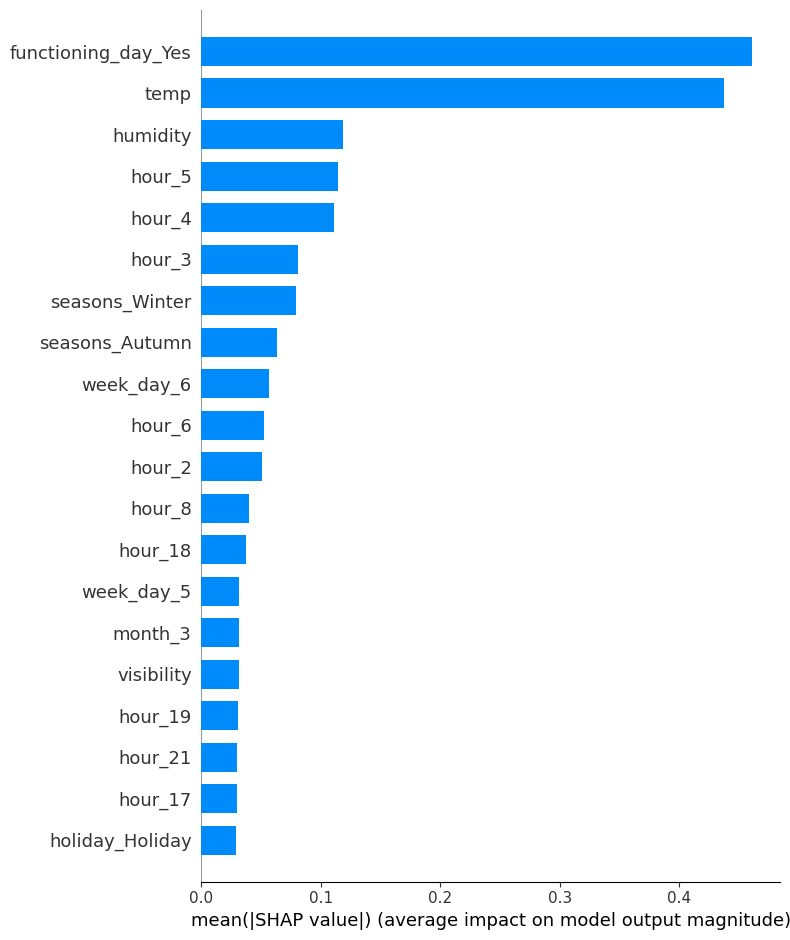

In [ ]:
#SHAP bar plot

shap.summary_plot(shap_values, X_test,feature_names = X.columns,plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


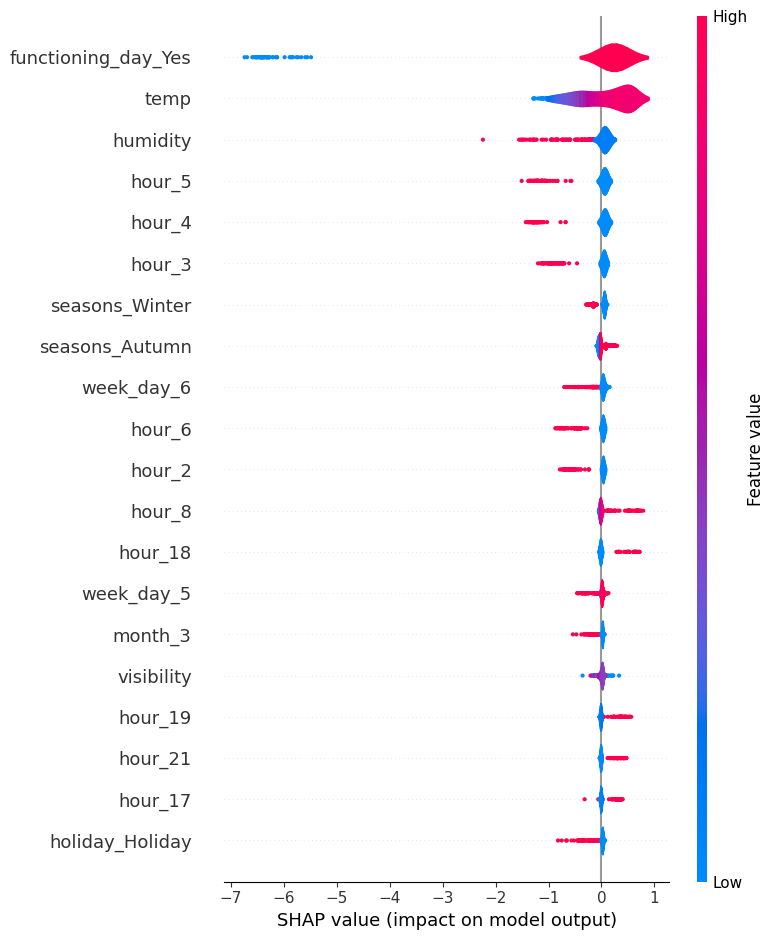

In [ ]:
#SHAP violin plot


shap.summary_plot(shap_values, X_test,feature_names = X.columns, plot_type="violin")

# Conclusion

**Conclusion** : It is found out that demand for bike rises with rise in temperature. At night demand for rental bike is most, In summer season the demand for rental bike is most, In monthly period it is seen that rental bike demand is low on January, February and December and high between may to august, It can be seen that bike demand rises after 5 AM and peaks at 8 AM, then again rises after 2 PM and peaks at 5PM then demand remain significantly above average demand 6PM and 11PM.That means in this 11 hours of a day bike demand is most. *XG boost regression model* can predict rental bike demand with *96.42% accuracy*.